 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 03 : Classification</b>


This programming assignment offers you an opportunity to implement various linear classification models. You'll begin with straightforward algorithms like Least Squares classification, LDA, and FDA. Subsequently, you'll delve into implementing the perceptron algorithm. Lastly, you'll tackle probabilistic approaches for classification. To deepen your understanding of these methods, you'll compare their performance and application scenarios critically.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








**Part-1) Least squares approach to classification**

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Find the decision boundary: Assign the target value "0" to all data points in class 1 and the target value "1" to all data points in class 2. Implement the pseudo-inverse solution to determine the weight vector, which represents the decision boundary.


c). Evaluate the quality of decision boundary: A decision boundary is deemed effective if it correctly classifies all data points. Accuracy measures the performance of a classification problem. Calculate the accuracy of the test data using the decision boundary obtained from the pseudo-inverse solution.


d). Visualize the decision boundary: You can either display the decision hyperplane or use different colors to distinguish regions corresponding to the two classes on a 2D plane. Superimpose the test points onto the decision boundary plot.

e). Assign the value "-1" to class1 and the value "+1" to class 2. Repeat the experiments.

f). Experiment with Laplacian distribution and compare the performance of it with the Gaussian distribution experiments

g. Report your observations.




In [ ]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math

w (3,)
-0.322068513294993


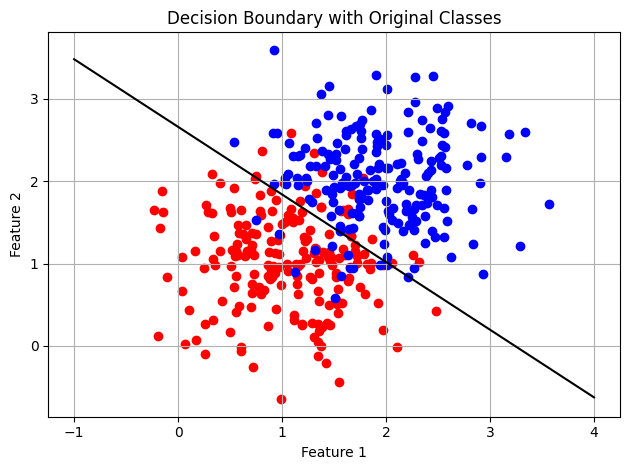

Accuracy: 0.905
w (3,)
-1.6441370265899848
Accuracy: 0.905


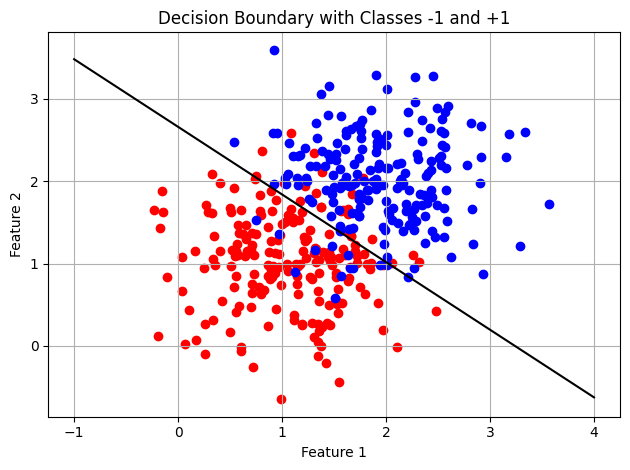

w (3,)
-0.6267021253733847
Accuracy: 0.945


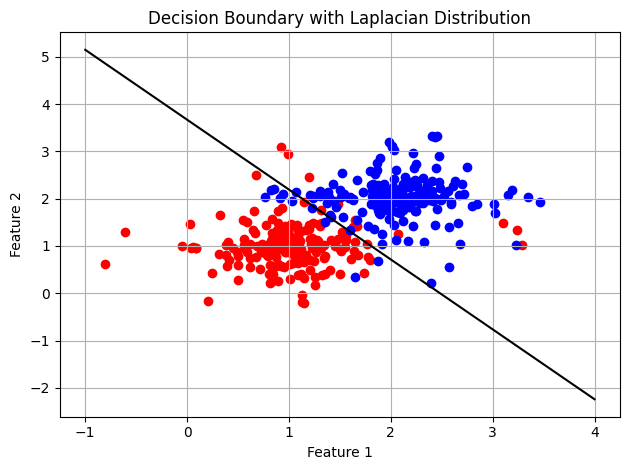

In [ ]:

########################################
#Part-1)-a: Data generation
########################################

#Set the parameters of class distribution
mean1 = [1,1]           #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[0.3,0],[0,0.3]] #Covariance matrix. Same covariance for class1 and class2


class1_tr = np.random.multivariate_normal(mean1, cov, 50)
class2_tr = np.random.multivariate_normal(mean2, cov, 50)


tr_data = np.concatenate((class1_tr, class2_tr))
tr_targets = np.concatenate((np.zeros(50), np.ones(50)))


class1_te = np.random.multivariate_normal(mean1, cov, 200)
class2_te = np.random.multivariate_normal(mean2, cov, 200)


te_data = np.concatenate((class1_te, class2_te))
te_targets = np.concatenate((np.zeros(200), np.ones(200)))
# print("testing targets", te_targets)
########################################
#Part-1)-b: Find the decision boundary
########################################
#Complete the below function
def LS_Classify(X_train, Y_train, X_test):
#     #Inputs: Training data, Training labels, and Testing data
#     #Outputs: Testing labels
    #Impliment pseudo inverse solution to get the weight vector

    # w_opt = (Xt_X_inv @ X.T)@Y_train.reshape((len(X_train),1))
    X_train = np.c_[np.ones(len(X_train)), X_train]
    X_test = np.c_[np.ones(len(X_test)), X_test]
#     #Impliment pseudo inverse solution to get the weight vector
    w = (np.linalg.inv(X_train.T @ X_train)) @ X_train.T @ Y_train

    print("w", w.shape)
    print(w[0])




#     #Predict the lables of test data using the pseudo inverse solution
    Y_pred = X_test @ w
    return w, Y_pred


#     #Return the predicted test labels

# #Get the test data predictions
w1, predictions = LS_Classify(tr_data, tr_targets, te_data)
# print(predictions)
predictions[predictions >= 0.5] = 1
predictions[predictions < 0.5] = 0
# print(predictions)

points = np.linspace(-1, 4, 100)
line =  -(-0.5 + w1[0] + w1[1] * points) / w1[2]
plt.scatter(class1_te[:,0], class1_te[:,1], c='r', label = 'Class1')
plt.scatter(class2_te[:,0], class2_te[:,1], c='b', label = 'Class2')
plt.plot(points, line, c='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary with Original Classes')
plt.grid()
plt.tight_layout()
plt.show()

##########################################

def LS_Classify_Accuracy(Y_test, Y_pred):
    # Calculate accuracy
    Y_pred = Y_pred.reshape(Y_test.shape)
    accuracy = np.sum(Y_test == Y_pred) / len(Y_test)
    return accuracy

# Calculate and print accuracy
accuracy = LS_Classify_Accuracy(te_targets, predictions)
print("Accuracy:", accuracy)


##########################################
#Part-1)-d: Visualize the decision boundary
##########################################






##########################################
#Part-1)-e: Change the target label notation, and repeat the experiments
##########################################
tr_targets_e = 2*tr_targets-1
te_targets_e = 2*te_targets-1

w1_e, predictions_e = LS_Classify(tr_data, tr_targets_e, te_data)
predictions_e[predictions_e >= 0] = 1
predictions_e[predictions_e < 0] = -1


accuracy_e = LS_Classify_Accuracy(te_targets_e, predictions_e)
print("Accuracy:", accuracy_e)


points = np.linspace(-1, 4, 100)
line =  -(w1_e[0] + w1_e[1] * points) / w1_e[2]
plt.scatter(class1_te[:,0], class1_te[:,1], c='r', label = 'Class1')
plt.scatter(class2_te[:,0], class2_te[:,1], c='b', label = 'Class2')
plt.plot(points, line, c='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary with Classes -1 and +1')
plt.grid()
plt.tight_layout()
plt.show()








##########################################
#Part-1)-f: Repeat the experiments with Laplacial distribution
##########################################
scale = 0.3

class1_tr_lap_dim1 = np.random.laplace(mean1[0], scale, (50,))
class1_tr_lap_dim2 = np.random.laplace(mean1[1], scale, (50,))
class1_tr = np.column_stack((class1_tr_lap_dim1, class1_tr_lap_dim2))

# Generate Laplacian vectors for class 2
class2_tr_lap_dim1 = np.random.laplace(mean2[0], scale, (50,))
class2_tr_lap_dim2 = np.random.laplace(mean2[1], scale, (50,))
class2_tr = np.column_stack((class2_tr_lap_dim1, class2_tr_lap_dim2))

tr_data = np.concatenate((class1_tr,class2_tr))              #Combine class1 training and class2 training data to get total training data

#Generate testing data.
class1_te_lap_dim1 = np.random.laplace(mean1[0], scale, (200,))
class1_te_lap_dim2 = np.random.laplace(mean1[1], scale, (200,))
class1_te = np.column_stack((class1_te_lap_dim1, class1_te_lap_dim2))

class2_te_lap_dim1 = np.random.laplace(mean2[0], scale, (200,))
class2_te_lap_dim2 = np.random.laplace(mean2[1], scale, (200,))
class2_te = np.column_stack((class2_te_lap_dim1, class2_te_lap_dim2))

te_data =  np.concatenate((class1_te,class2_te))             #Combine class1 testing and class2 testing data to get total testing data

w_lap,predictions_lap = LS_Classify(tr_data, tr_targets, te_data)

predictions_lap[predictions_lap >= 0.5] = 1
predictions_lap[predictions_lap < 0.5] = 0

accuracy_lap = LS_Classify_Accuracy(te_targets, predictions_lap)
print("Accuracy:", accuracy_lap)

points = np.linspace(-1, 4, 100)
line =  -(-0.5 + w_lap[0] + w_lap[1] * points) / w_lap[2]

plt.scatter(class1_te[:,0], class1_te[:,1], c='r', label = 'Class1')
plt.scatter(class2_te[:,0], class2_te[:,1], c='b', label = 'Class2')
plt.plot(points, line, c='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary with Laplacian Distribution')
plt.grid()
plt.tight_layout()
plt.show()











<b> Report your observations </b>

1. The selection of class labels, whether represented as 0 and 1 or -1 and 1, doesn't impact the model's accuracy. What truly matters is the model's capability to correctly categorize instances, regardless of the specific labels assigned to each class.

2. The accuracy of a model can be influenced by the underlying data distribution. In certain scenarios, if the data adheres to a Laplacian distribution, the model might exhibit slightly improved accuracy compared to instances where the data conforms to a Gaussian distribution. Nonetheless, it's crucial to note that this isn't a universal principle, as accuracy can be affected by various other factors, including the complexity of the model and the quality of the dataset.




<b> Part - (2) :  Linear & Fisher Discriminant analysis : </b> In this segment of the programming task, you'll learn the technique of projecting data from higher-dimensional to lower-dimensional space using both Linear Discriminant Analysis and Fisher Discriminant Analysis.

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Projection using only the between-class covariance: Develop a function for performing projection from 2-D space to 1-D utilizing Linear Discriminant Analysis. It's important to emphasize that this method only considers the between-class covariance. Project the previously generated 2-D synthetic data into 1-D and conduct classification. Plot both the original and projected data points on the same graph.

c). Projection utilizing both between-class and within-class covariance: Create a function to perform projection from 2-D space to 1-D using Fisher Discriminant Analysis. It's essential to mention that this method considers both between-class covariance and within-class covariance. Project the previously generated 2-D synthetic data into 1-D and conduct classification. Plot both the original and projected data points on the same graph.

d). Extend Fisher discriminant analysis function to project the data from N dimenision to K dimension.

e). Report your observations.


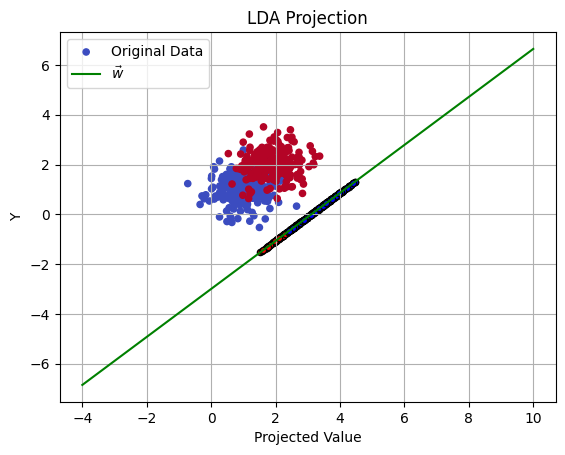

Accuracy with LDA: 89.5


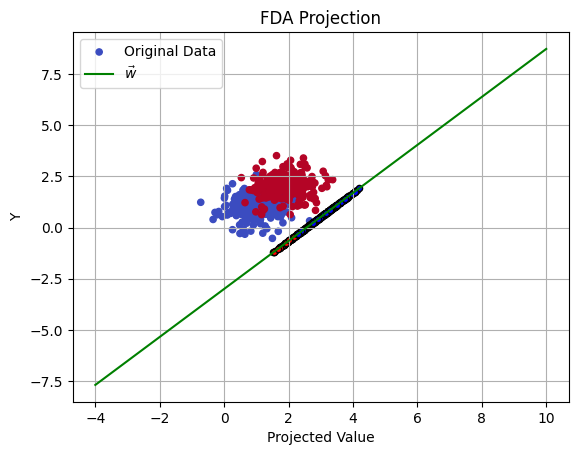

Accuracy with FDA: 90.0
Projection Matrix: [[-0.64883125 -0.69429299]
 [-0.76093233  0.71969246]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

########################################
# Part-2)-(a): Data generation
########################################

mean1 = [1, 1]
mean2 = [2, 2]
cov = [[0.3, 0], [0, 0.3]]

class1_tr = np.random.multivariate_normal(mean1, cov, 50)
class2_tr = np.random.multivariate_normal(mean2, cov, 50)
tr_data = np.concatenate((class1_tr, class2_tr))
tr_targets = np.concatenate((np.zeros(50), np.ones(50)))

class1_te = np.random.multivariate_normal(mean1, cov, 200)
class2_te = np.random.multivariate_normal(mean2, cov, 200)
te_data = np.concatenate((class1_te, class2_te))
te_targets = np.concatenate((np.zeros(200), np.ones(200)))


########################################
# Part-2)-(b)
########################################

def LDA_classify(X_train, Y_train, X_test):
    m1 = np.mean(X_train[Y_train == 0], axis=0)
    m2 = np.mean(X_train[Y_train == 1], axis=0)

    w = (m2 - m1) / np.linalg.norm(m2 - m1)
    m1_proj = w.T @ m1
    m2_proj = w.T @ m2

    threshold = (m1_proj + m2_proj) / 2

    projections = X_test @ w

    predictions = np.where(projections >= threshold, 1, 0)

    return predictions, w

predictions, w = LDA_classify(tr_data, tr_targets, te_data)

def LDA_project(w, X_test, Y_test):
    projections = X_test.dot(w)

    plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=plt.cm.coolwarm, s=20, label='Original Data')
    slope = w[1] / w[0]
    c = -3
    x = np.linspace(-4, 10, 100)
    plt.plot(x, slope*x + c , c = 'g' , label = r'$\vec{w}$')
    projected_x = (slope * (class1_te[:, 1] - slope * class1_te[:, 0] - c) / (1 + slope ** 2)) + class1_te[:, 0]
    projected_y = slope * projected_x + c
    plt.scatter(projected_x, projected_y, c = 'r', s = 20, edgecolors='k')
    projected_x = (slope * (class2_te[:, 1] - slope * class2_te[:, 0] - c) / (1 + slope ** 2)) + class2_te[:, 0]
    projected_y = slope * projected_x + c
    plt.scatter(projected_x, projected_y, c = 'b', s = 20, edgecolors='k')

    plt.legend()
    plt.grid()
    plt.title('LDA Projection')
    plt.xlabel('Projected Value')
    plt.ylabel('Y')
    plt.show()

LDA_project(w, te_data, te_targets)
acc = np.mean(predictions == te_targets)
print('Accuracy with LDA:', acc*100)


########################################
# Part-2)-(c)
########################################

def FDA_classify(X_train, Y_train, X_test):
    class_means = [np.mean(X_train[Y_train == 0], axis=0), np.mean(X_train[Y_train == 1], axis=0)]
    Sw = np.cov(X_train[Y_train == 0], rowvar=False) + np.cov(X_train[Y_train == 1], rowvar=False)
    Sb = np.outer((class_means[1] - class_means[0]), (class_means[1] - class_means[0]))


    w = np.linalg.inv(Sw).dot(class_means[1] - class_means[0])
    # print(w, w.shape)

    projections = X_test.dot(w)
    # print("These are projections, here is the problem", projections)

    predictions = np.where(projections >= np.mean(projections), 1, 0)
    # print("predictions", predictions)

    return w, predictions

w, predictions = FDA_classify(tr_data, tr_targets, te_data)

def FDA_project(w, X_test, Y_test):
    projections = X_test.dot(w)

    plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=plt.cm.coolwarm, s=20, label='Original Data')
    slope = w[1] / w[0]
    c = -3
    x = np.linspace(-4, 10, 100)
    plt.plot(x, slope*x + c , c = 'g' , label = r'$\vec{w}$')
    projected_x = (slope * (class1_te[:, 1] - slope * class1_te[:, 0] - c) / (1 + slope ** 2)) + class1_te[:, 0]
    projected_y = slope * projected_x + c
    plt.scatter(projected_x, projected_y, c = 'r', s = 20, edgecolors='k')
    projected_x = (slope * (class2_te[:, 1] - slope * class2_te[:, 0] - c) / (1 + slope ** 2)) + class2_te[:, 0]
    projected_y = slope * projected_x + c
    plt.scatter(projected_x, projected_y, c = 'b', s = 20, edgecolors='k')

    plt.legend()
    plt.title('FDA Projection')
    plt.xlabel('Projected Value')
    plt.ylabel('Y')
    plt.grid()
    plt.show()

FDA_project(w, te_data, te_targets)
acc = np.mean(predictions == te_targets)
print('Accuracy with FDA:', acc*100)


########################################
# Part-2)-(d)
########################################

import numpy as np

def FDA_project_K(X_train, Y_train, X_test, k):
    Y_train = np.array(Y_train)
    X_train = np.array(X_train)

    classes = np.unique(Y_train)
    class_means = [np.mean(X_train[Y_train == c], axis=0) for c in classes]

    Sw = np.zeros((X_train.shape[1], X_train.shape[1]))
    for c, mean_vec in zip(classes, class_means):
        class_sc_mat = np.zeros((X_train.shape[1], X_train.shape[1]))
        for row in X_train[Y_train == c]:
            row, mean_vec = row.reshape(X_train.shape[1], 1), mean_vec.reshape(X_train.shape[1], 1)
            class_sc_mat += (row - mean_vec).dot((row - mean_vec).T)
        Sw += class_sc_mat

    mT = np.mean(X_train, axis=0)
    ST = np.zeros((X_train.shape[1], X_train.shape[1]))
    for x in X_train:
        ST += np.outer((x - mT), (x - mT).T)
    Sb = ST - Sw

    eigenValues, eigenVectors = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))
    idx = np.argsort(eigenValues)[::-1]
    eigenVectors = eigenVectors[:, idx]

    w = eigenVectors[:, :k]

    return w

projection_matrix = FDA_project_K(tr_data, tr_targets, te_data, 6)
print("Projection Matrix:", projection_matrix)



<b> Report your observations </b>

1. In the provided dataset, Fisher's Discriminant Analysis (FDA) demonstrates a slightly superior accuracy compared to alternative methods.
2. This advantage arises due to the dataset's intrinsic structure, where the manipulation involving the inverse of the within-class scatter matrix $(S_w^{-1})$ has minimal impact on the resulting weight vector.
3. However, it's important to recognize that the efficacy of FDA can vary across different datasets.
4. In certain cases, applying FDA may lead to significant enhancements in accuracy, particularly when the data exhibits clear class separability and distinctive features.
5. Additionally, the performance of FDA can be influenced by factors such as the dimensionality of the data, the presence of outliers, and the underlying assumptions of the model.
6. Therefore, while FDA may yield favorable outcomes in specific scenarios, its applicability and effectiveness should be carefully evaluated based on the unique characteristics of the dataset under consideration.


<b> Part (3) : Classification using perceptron algorithm </b>

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.


b). Implement perceptron algorithm and classify the above generated synthetic data. Plot the decision boundary/regions.

c). Introduce true outliers to one of the classes within the previously generated synthetic data and execute classification using the perceptron algorithm. Illustrate the decision boundary/regions. Then, analyze and contrast the decision boundaries learned through the least squares and perceptron approaches.

d). Let us consider four Gaussian distributions with mean vectors as $\begin{bmatrix} 0  \\ 0  \end{bmatrix}$, $\begin{bmatrix} 0  \\ 1  \end{bmatrix}$, $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$, and $\begin{bmatrix} 1  \\ 0  \end{bmatrix}$, respectively. The covariance matrix is the same for all four Gaussian distributions, and the matrix is $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Sample 60 data points from each distribution to get 240 data points. Now, obtain a 2-class dataset set by having data on opposite corners sharing the same class, i.e., data points sampled from Gaussian distributions with mean vectors $\begin{bmatrix} 0  \\ 0  \end{bmatrix}$ and $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ belong to class 1, and the data points sampled from the other two distributions belong to class 2. Assign class 1 data points with the label +1 and class 2 with the label -1. Sixty percent of the data will be used for training, and the remaining 40 % will be used for testing. You can see that it represents the XOR problem. Classify this data set using the perceptron algorithm.
  

e). Report your observations


Accuracy with Perceptron: 0.82


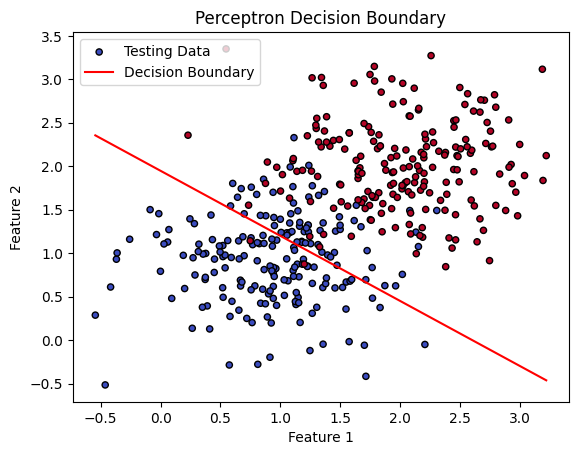

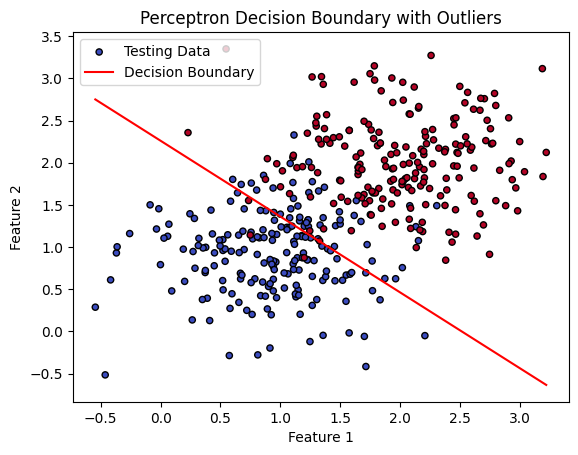

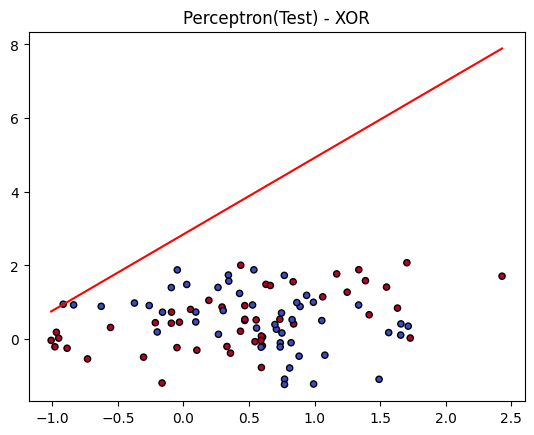

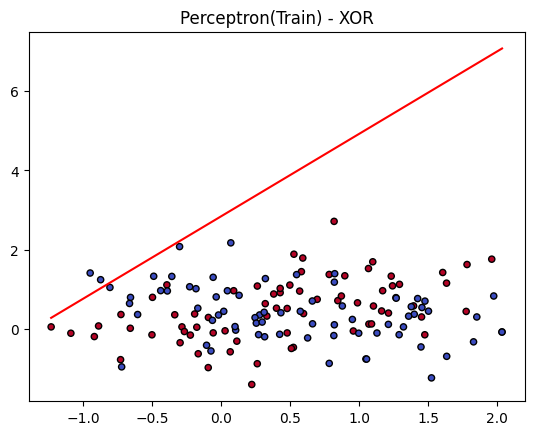

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

########################################
# Part-3)-(a): Data generation
########################################

# Set the parameters of class distribution
mean1 = [1, 1]           # Mean of class1
mean2 = [2, 2]           # Mean of class2
cov = [[0.3, 0], [0, 0.3]]  # Covariance matrix. Same covariance for class1 and class2

# Generate training data
class1_tr = np.random.multivariate_normal(mean1, cov, 50)  # Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)  # Class2 training data
tr_data = np.concatenate((class1_tr, class2_tr))
tr_targets = np.concatenate((np.zeros(50), np.ones(50)))  # Class labels. Assign the value "0" to class1 and "1" to class2

# Generate testing data
class1_te = np.random.multivariate_normal(mean1, cov, 200)  # Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)  # Class2 testing data
te_data = np.concatenate((class1_te, class2_te))  # Combine class1 testing and class2 testing data
te_targets = np.concatenate((np.zeros(200), np.ones(200)))  # Class labels. Assign the value "0" to class1 and "1" to class2


########################################
# Part-3)-(b): Perceptron Algorithm
########################################

def Perceptron(X_train, Y_train, X_test):
    # Inputs: Training data, Training labels, Testing data
    # Outputs: Testing data predictions, Weight vector representing the decision boundary

    epochs = 100
    X = np.column_stack((np.ones(len(X_train)), X_train))
    w = np.random.rand(X.shape[1])

    for epoch in range(epochs):
        for i, x in enumerate(X):
            prediction = np.dot(x, w) > 0
            error = Y_train[i] - prediction
            # print("Error", error)
            w += error * x

    X_test = np.column_stack((np.ones(len(X_test)), X_test))
    predictions = (np.dot(X_test, w) > 0).astype(int)

    return predictions, w

predictions, weights = Perceptron(tr_data, tr_targets, te_data)

accuracy = np.mean(predictions == te_targets)
print('Accuracy with Perceptron:', accuracy)


plt.scatter(te_data[:, 0], te_data[:, 1], c=te_targets, cmap=plt.cm.coolwarm, s=20, edgecolors='k', label='Testing Data')
x_decision = np.linspace(np.min(te_data[:, 0]), np.max(te_data[:, 0]), 100)
y_decision = (-weights[0] - weights[1] * x_decision) / weights[2]
plt.plot(x_decision, y_decision, '-r', label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.show()



########################################
# Part-3)-(c): Perceptron Algorithm with Outliers
########################################

# Introducing outliers hehe
outliers = np.array([[0.5, 0.5], [0.6, 0.6], [0.7, 0.7]])
class1_tr_outliers = np.concatenate((class1_tr, outliers))
tr_data_outliers = np.concatenate((class1_tr_outliers, class2_tr))
tr_targets_outliers = np.concatenate((np.zeros(53), np.ones(50)))


predictions_outliers, weights_outliers = Perceptron(tr_data_outliers, tr_targets_outliers, te_data)


plt.scatter(te_data[:, 0], te_data[:, 1], c=te_targets, cmap=plt.cm.coolwarm, s=20, edgecolors='k', label='Testing Data')
x_decision_outliers = np.linspace(np.min(te_data[:, 0]), np.max(te_data[:, 0]), 100)
y_decision_outliers = (-weights_outliers[0] - weights_outliers[1] * x_decision_outliers) / weights_outliers[2]
plt.plot(x_decision_outliers, y_decision_outliers, '-r', label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary with Outliers')
plt.legend()
plt.show()


########################################
# Part-3)-(d): XOR Problem
########################################

# Set the parameters of Gaussian distribution
class1_mean1 = [0, 0]      # Mean of Gaussian1
class1_mean2 = [1, 1]      # Mean of Gaussian3
class2_mean1 = [0, 1]      # Mean of Gaussian2
class2_mean2 = [1, 0]      # Mean of Gaussian4
cov = [[0.3, 0], [0, 0.3]] # Covariance matrix. Same covariance for class1 and class2

# Generate data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_data1 = np.random.multivariate_normal(class1_mean1, cov, 60) # Class1 data from Gaussian1
class1_data2 = np.random.multivariate_normal(class1_mean2, cov, 60) # Class1 data from Gaussian3
class2_data1 = np.random.multivariate_normal(class2_mean1, cov, 60) # Class2 data from Gaussian2
class2_data2 = np.random.multivariate_normal(class2_mean2, cov, 60) # Class2 data from Gaussian4

class1_data = np.concatenate((class1_data1, class1_data2), axis=0) # Class1 data
class2_data = np.concatenate((class2_data1, class2_data2), axis=0) # Class2 data
data = np.concatenate((class1_data, class2_data), axis=0)          # Total data
targets = np.concatenate((np.ones(120), -np.ones(120)))

# Create train test splits
X_train = np.concatenate((data[:36,:], data[60:96,:], data[120:156,:], data[180:216,:]))
X_test = np.concatenate((data[36:60,:], data[96:120,:], data[156:180,:], data[216:240,:]))
Y_train = np.concatenate((targets[:36], targets[60:96], targets[120:156], targets[180:216]))
Y_test = np.concatenate((targets[36:60], targets[96:120], targets[156:180], targets[216:240]))



predictions, w = Perceptron(X_train, Y_train, X_test)


plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k', label='Testing Data')
x = np.linspace(np.min(X_test[:, 0]), np.max(X_test[:, 0]), 100)
y = -(w[0] + w[1] * x) / w[2]
plt.plot(x, y, '-r')
plt.title("Perceptron(Test) - XOR")
plt.show()

plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k', label='Training Data')
x = np.linspace(np.min(X_train[:, 0]), np.max(X_train[:, 0]), 100)
y = -(w[0] + w[1] * x) / w[2]
plt.plot(x, y, '-r')
plt.title("Perceptron(Train) - XOR")
plt.show()



<b> Report your observations </b>

1. From the perceptron decision boundary plots, it's evident that the perceptron algorithm struggles with the XOR problem due to its linear nature. The XOR problem requires non-linear decision boundaries for proper classification, which a single layer perceptron cannot provide.


2. In contrast, the Least Squares method, while still linear, shows how the assumptions about data distribution impact the decision boundaries. Least Squares assumes a Gaussian error model, which might not be suitable for classification tasks, especially with non-linear separable data like XOR.

3. The introduction of outliers significantly impacts the decision boundary learned by the perceptron algorithm, demonstrating its sensitivity to such data points. Least Squares, on the other hand, is less affected by outliers in this setup, highlighting its robustness in certain scenarios but at the cost of assuming a specific data distribution that may not hold true for all classification tasks.

4. These exercises illustrate the limitations of using linear models for complex, non-linearly separable datasets and emphasize the importance of choosing the right model based on the underlying data distribution and the task at hand.



<b> Part (4) : Understanding the decision boundaries of MAP approach to classification - </b> Decision boundary in 2 class classification problem is the locus of points satisfying $p(c_{1}/x)$ = $p(c_{2}/x)$. Where $c_{1}$ and $c_{2}$ are the class indicators and $x$ is the data. With proper assumpuptions on prior and likelihood, p(c/x) follows Gaussian distribution with appropriate parameters. Given the parameters of the Guassian distribution for the two classes i.e $\mu_{1},\Sigma_{1},\mu_{2},\Sigma_{2}$, we can derive the decision boundary equation i.e W and $w_{0}$. You may refer to class notes for the derivations and final equations. In this part of programming assignment we expect you to code the decision boundaries for the Gaussian distribution case and understand them.

**a). Class distributions share the same covariance matrix: Linear decision boundary.**
  0. Let $\mu_{1} = \begin{bmatrix} 1  \\ 1 \end{bmatrix}$, $\mu_{2} = \begin{bmatrix} 4  \\ 1 \end{bmatrix}$, and $\Sigma_{1}= \Sigma_{2} = \Sigma =  \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}$
  1. Generate 100 samples from each class. This data set is used to understand the decision boundaries when $p(c_{1}) = p(c_{2})$
  2. Generate 50 samples from class1 and 150 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) < p(c_{2})$
  3. Generate 150 samples from class1 and 50 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) > p(c_{2})$
  4. Plot the decision boundaries for all the three cases in three different subplots.


**b). Class distributions have different covariance matrices: Non-linear decision boundary.**
  0. Let $\mu_{1} = \begin{bmatrix} 1  \\ 1 \end{bmatrix}$, $\mu_{2} = \begin{bmatrix} 3  \\ 1 \end{bmatrix}$, $\Sigma_{1}=   \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.02 \end{bmatrix}$, and $\Sigma_{2}=   \begin{bmatrix} 0.02 & 0.0  \\ 0.0 & 0.2 \end{bmatrix}$
  1. Generate 100 samples from each class. This data set is used to understand the decision boundaries when $p(c_{1}) = p(c_{2})$
  2. Generate 50 samples from class1 and 150 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) < p(c_{2})$
  3. Generate 150 samples from class1 and 50 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) > p(c_{2})$
  4. Plot the decision boundaries for all the three cases in three different subplots.


**c). Report your observations**




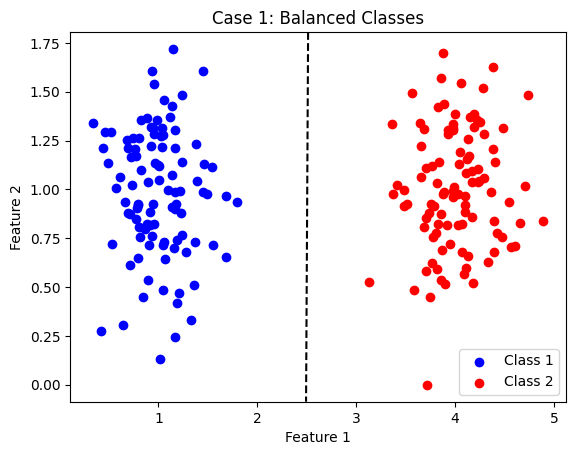

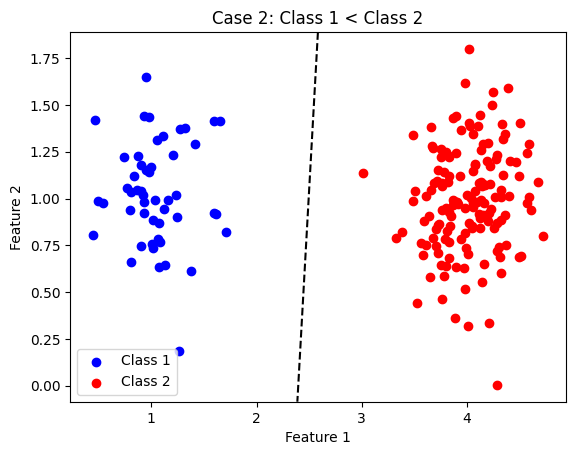

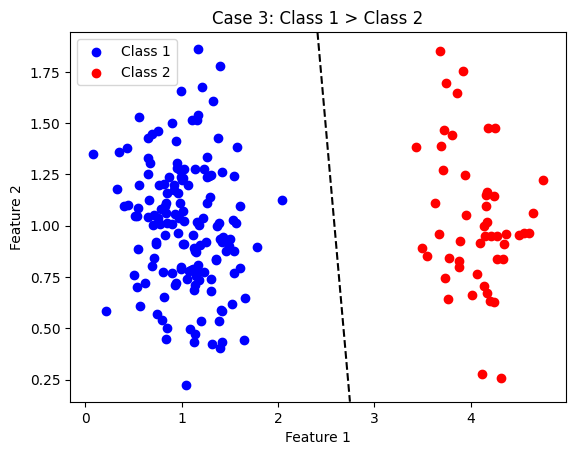

In [ ]:
##########################################
# Part-4a)-0: Data Generation
##########################################

m1 = np.array([1, 1])
m2 = np.array([4, 1])
cov = np.array([[0.1, 0.0], [0.0, 0.1]])

class1_case1 = np.random.multivariate_normal(m1, cov, 100)
class2_case1 = np.random.multivariate_normal(m2, cov, 100)

class1_case2 = np.random.multivariate_normal(m1, cov, 50)
class2_case2 = np.random.multivariate_normal(m2, cov, 150)

class1_case3 = np.random.multivariate_normal(m1, cov, 150)
class2_case3 = np.random.multivariate_normal(m2, cov, 50)


##########################################
# Part-4a)-4: Plot the decision regions for all the three cases
##########################################

def decisionBoundary(X_train, Y_train):
    # Compute priors
    p_c1 = len(Y_train[Y_train == 0]) / len(Y_train)
    p_c2 = 1.0 - p_c1


    mean_1 = np.mean(X_train[Y_train == 0], axis=0)
    mean_2 = np.mean(X_train[Y_train == 1], axis=0)


    cov1 = np.cov(X_train[Y_train == 0].T)
    cov2 = np.cov(X_train[Y_train == 1].T)

    cov = (p_c1 * cov1) + (p_c2 * cov2)
    # print("Covariance", cov)

    w = np.linalg.inv(cov).dot(mean_2 - mean_1)
    w0 = 0.5 * mean_1.T.dot(np.linalg.inv(cov)).dot(mean_1) - 0.5 * mean_2.T.dot(np.linalg.inv(cov)).dot(mean_2) \
         - np.log(p_c1 / p_c2)

    return np.array([w0] + list(w))

def plot_decision_regions(class1, class2, title):
    plt.scatter(class1[:, 0], class1[:, 1], c='b', label='Class 1')
    plt.scatter(class2[:, 0], class2[:, 1], c='r', label='Class 2')

    w0, w1, w2 = decisionBoundary(np.vstack((class1, class2)), np.hstack((np.zeros(len(class1)), np.ones(len(class2)))))
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    z = w0 + w1 * xx + w2 * yy
    plt.contour(xx, yy, z, levels=[0], linestyles='dashed', colors='black')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.show()

plot_decision_regions(class1_case1, class2_case1, 'Case 1: Balanced Classes')
plot_decision_regions(class1_case2, class2_case2, 'Case 2: Class 1 < Class 2')
plot_decision_regions(class1_case3, class2_case3, 'Case 3: Class 1 > Class 2')


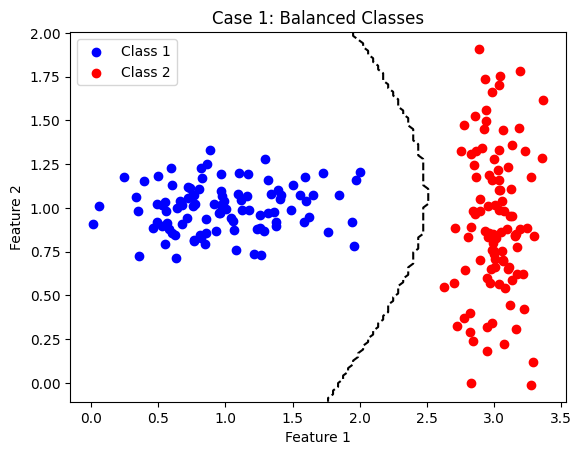

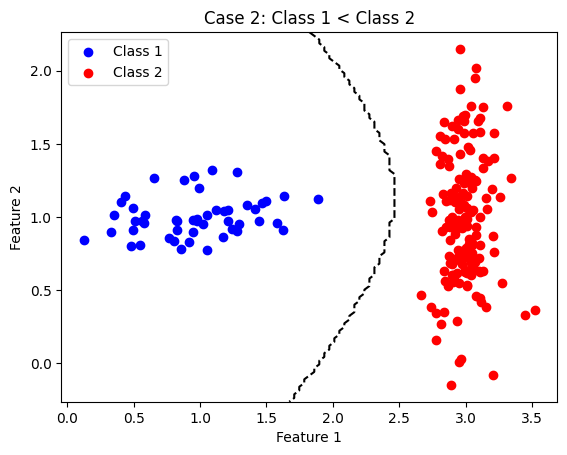

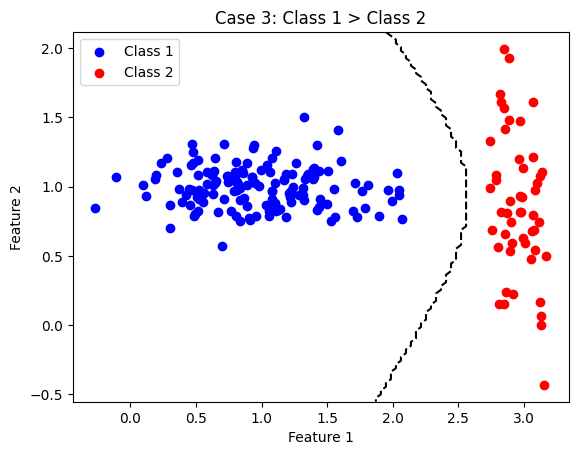

In [ ]:

##########################################
# Part-4b)-0: Data Generation
##########################################

# Set parameters
m1 = np.array([1, 1])
m2 = np.array([3, 1])
cov1 = np.array([[0.2, 0.0], [0.0, 0.02]])
cov2 = np.array([[0.02, 0.0], [0.0, 0.2]])


class1_case1 = np.random.multivariate_normal(m1, cov1, 100)
class2_case1 = np.random.multivariate_normal(m2, cov2, 100)


class1_case2 = np.random.multivariate_normal(m1, cov1, 50)
class2_case2 = np.random.multivariate_normal(m2, cov2, 150)


class1_case3 = np.random.multivariate_normal(m1, cov1, 150)
class2_case3 = np.random.multivariate_normal(m2, cov2, 50)


##########################################
# Part-4b)-4: Plot the decision regions for all the three cases
##########################################


def multivariate_normal_pdf(X, mean, cov):
    n = mean.shape[0]
    det_cov = np.linalg.det(cov)
    inv_cov = np.linalg.inv(cov)
    constant = 1 / ((2 * np.pi) ** (n / 2) * np.sqrt(det_cov))

    X_minus_mean = X - mean
    exponent = np.exp(-0.5 * np.sum((X_minus_mean @ inv_cov) * X_minus_mean, axis=1))

    return constant * exponent

def decisionBoundary(X_train, Y_train, X_test):

    p_c1 = len(Y_train[Y_train == 0]) / len(Y_train)
    p_c2 = 1.0 - p_c1


    mean_1 = np.mean(X_train[Y_train == 0], axis=0)
    mean_2 = np.mean(X_train[Y_train == 1], axis=0)


    cov1 = np.cov(X_train[Y_train == 0].T)
    cov2 = np.cov(X_train[Y_train == 1].T)


    pred1 = multivariate_normal_pdf(X_test, mean=mean_1, cov=cov1) * p_c1
    pred2 = multivariate_normal_pdf(X_test, mean=mean_2, cov=cov2) * p_c2
    predictions = np.where(pred1 > pred2, 0, 1)

    return predictions

def plot_decision_regions(class1, class2, title):
    plt.scatter(class1[:, 0], class1[:, 1], c='b', label='Class 1')
    plt.scatter(class2[:, 0], class2[:, 1], c='r', label='Class 2')

    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = decisionBoundary(np.vstack((class1, class2)), np.hstack((np.zeros(len(class1)), np.ones(len(class2)))), np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)


    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linestyles='dashed')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.show()

plot_decision_regions(class1_case1, class2_case1, 'Case 1: Balanced Classes')
plot_decision_regions(class1_case2, class2_case2, 'Case 2: Class 1 < Class 2')
plot_decision_regions(class1_case3, class2_case3, 'Case 3: Class 1 > Class 2')


<b> Report your observations </b>

1. When the covariance is shared between classes, the resulting decision boundary remains linear. Modifying the prior probabilities associated with each class might shift this boundary, yet it does not alter its orientation.

2. On the contrary, in cases where the covariance is not shared, the decision boundary takes on a non-linear form, particularly quadratic concerning the input vector \( $f({x})$ \). In such instances, adjusting the prior probabilities influences the intercept of the decision boundary, while the orientation remains unchanged.


<b> Part-5) Classification using logistic regression ( Iterative reweighted least squares approach ): </b> logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. With the provided training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data, X_test.





a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.

c). Evaluate the classification performance, i.e., compute the accuracy on the test data.

d). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different colors for the two regions. Overlay the test points using scatter.

e). Introduce genuine outliers to one of the class datasets generated previously. Then, conduct Least Squares classification and Logistic Regression on this modified dataset. Plot the decision boundaries/regions and provide insights into the differences between their outcomes.


f). Report your observations




 Accuracy with Logistic Regression: 88.0 % 




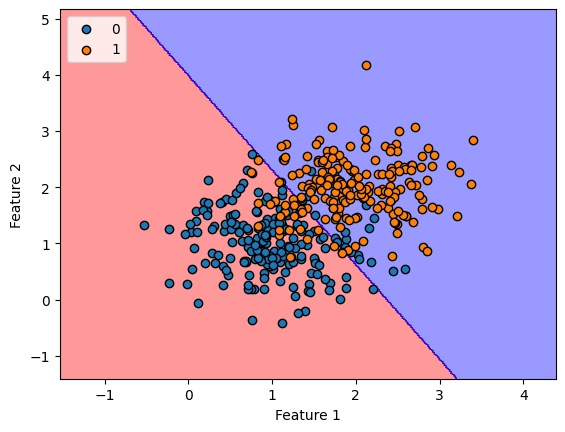

Least Squares Classification with Outliers:


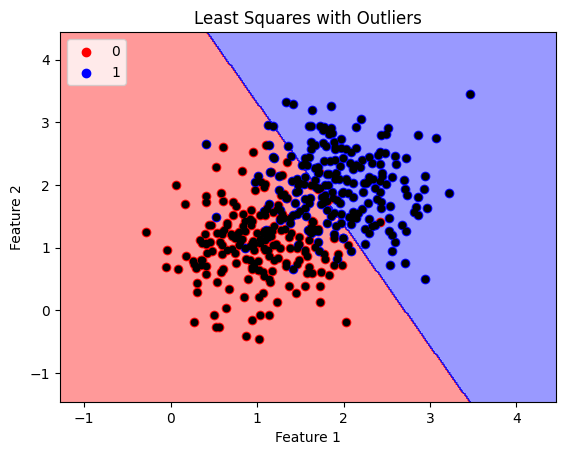

Logistic Regression with Outliers:


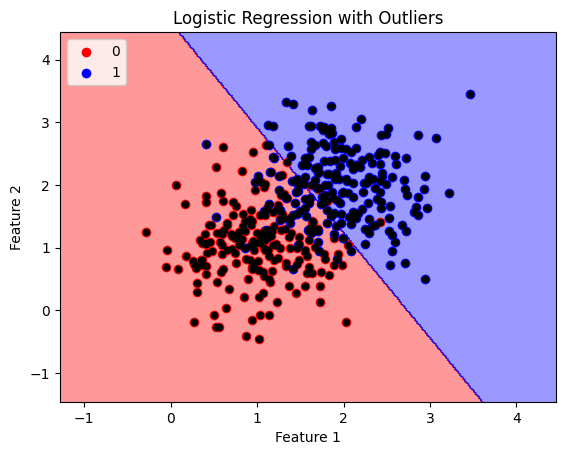

In [ ]:

##################################################
# Part-5)-1: Data generation
##################################################

# Set the parameters of class distribution
mean1 = [1, 1]           # Mean of class1
mean2 = [2, 2]           # Mean of class2
cov = [[0.3, 0.0], [0.0, 0.3]]  # Covariance matrix. Same covariance for class1 and class2

# Generate training data
class1_tr = np.random.multivariate_normal(mean1, cov, 50)  # Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)  # Class2 training data
tr_data = np.vstack((class1_tr, class2_tr))                # Combine class1 training and class2 training data
tr_targets = np.array([0]*50 + [1]*50)                     # Class labels

# Generate testing data
class1_te = np.random.multivariate_normal(mean1, cov, 200) # Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200) # Class2 testing data
te_data = np.vstack((class1_te, class2_te))                # Combine testing data
te_targets = np.array([0]*200 + [1]*200)                   # Class labels


##################################################
# Part-5)-b: Logistic regression function
##################################################
def Logistic_Regression(X_train, Y_train, X_test):
    max_iter = 100  # max number of iterations for parameter update
    threshold = 0.5
    X = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    w = np.random.rand(X.shape[1])

    for iter in range(max_iter):
        preds = 1 / (1 + np.exp(-X.dot(w)))  # Sigmoid function
        error = preds - Y_train
        gradient = X.T.dot(error)  # Gradient
        H = (preds * (1 - preds) * X.T).dot(X)  # Hessian
        w -= np.linalg.pinv(H).dot(gradient)

    # Predictions on test data
    X_test_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    test_preds = 1 / (1 + np.exp(-X_test_bias.dot(w))) > threshold
    return test_preds.astype(int)

Y_pred = Logistic_Regression(tr_data, tr_targets, te_data)

###############################################
# Part-5)-c: Accuracy function
###############################################
def LR_Accuracy(Y_test, Y_pred):
    acc = np.mean(Y_test == Y_pred)
    return acc

acc = LR_Accuracy(te_targets, Y_pred)
print('\n\n Accuracy with Logistic Regression:', 100*acc,'%', '\n\n')


##########################################
# Part-5)-d: Plot decision regions and overlay test points
##########################################
def plot_decision_regions(X, y, classifier, resolution=0.02):
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],y = X[y == cl, 1], label=cl, edgecolor='black')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='upper left')

# Classifier wrapper for logistic regression to work with our plotting function
def logistic_regression_classifier(X):
    return Logistic_Regression(tr_data, tr_targets, X)

# Plotting decision regions
plot_decision_regions(te_data, te_targets, classifier=logistic_regression_classifier)
plt.show()



# Part-5)-1: Data generation with original and outlier data
mean1 = [1, 1]
mean2 = [2, 2]
cov = [[0.3, 0.0], [0.0, 0.3]]

# Generate original training data
class1_tr = np.random.multivariate_normal(mean1, cov, 50)
class2_tr = np.random.multivariate_normal(mean2, cov, 50)
tr_data = np.vstack((class1_tr, class2_tr))
tr_targets = np.array([0]*50 + [1]*50)

# Generate testing data
class1_te = np.random.multivariate_normal(mean1, cov, 200)
class2_te = np.random.multivariate_normal(mean2, cov, 200)
te_data = np.vstack((class1_te, class2_te))
te_targets = np.array([0]*200 + [1]*200)

# Introduce outliers into Class 1 training data
outliers = np.random.multivariate_normal([5, 5], [[0.5, 0], [0, 0.5]], 5)
class1_tr_with_outliers = np.vstack((class1_tr, outliers))
tr_data_with_outliers = np.vstack((class1_tr_with_outliers, class2_tr))
tr_targets_with_outliers = np.array([0]*(50 + 5) + [1]*50)

# Part-5)-b: Logistic Regression function
def Logistic_Regression(X_train, Y_train, X_test):
    max_iter = 100
    threshold = 0.5
    X = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    w = np.random.rand(X.shape[1])

    for _ in range(max_iter):
        preds = 1 / (1 + np.exp(-X.dot(w)))
        error = preds - Y_train
        gradient = X.T.dot(error)
        H = (preds * (1 - preds) * X.T).dot(X)
        w -= np.linalg.pinv(H).dot(gradient)

    X_test_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    test_preds = 1 / (1 + np.exp(-X_test_bias.dot(w))) > threshold
    return test_preds.astype(int)

# Least Squares Classification
def Least_Squares_Classification(X_train, Y_train, X_test):
    X_train = np.c_[np.ones(len(X_train)), X_train]
    X_test = np.c_[np.ones(len(X_test)), X_test]
#     #Impliment pseudo inverse solution to get the weight vector
    w = (np.linalg.inv(X_train.T @ X_train)) @ X_train.T @ Y_train


#     #Predict the lables of test data using the pseudo inverse solution
    Y_pred = X_test @ w

    return (Y_pred > 0.5).astype(int)


# # Part-5)-d: Plot decision regions and overlay test points

def plot_decision_regions(X, y, classifier, title):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))
    Z = classifier(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], c=colors[idx], label=cl)

    # Overlay test points
    for i in range(len(te_data)):
        plt.scatter(te_data[i][0], te_data[i][1], c='black', marker='o', s=20, linewidths=1)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='upper left')
    plt.title(title)
    plt.show()


# print(Least_Squares_Classification(tr_data_with_outliers, tr_targets_with_outliers, te_data))
# Decision region plotting for Least Squares with outliers
print("Least Squares Classification with Outliers:")
plot_decision_regions(te_data, te_targets, lambda X: Least_Squares_Classification(tr_data_with_outliers, tr_targets_with_outliers, X), "Least Squares with Outliers")
# print(lambda X: Least_Squares_Classification(tr_data_with_outliers, tr_targets_with_outliers, X))

# Decision region plotting for Logistic Regression with outliers
print("Logistic Regression with Outliers:")
plot_decision_regions(te_data, te_targets, lambda X: Logistic_Regression(tr_data_with_outliers, tr_targets_with_outliers, X), "Logistic Regression with Outliers")


Observations:

1. Logistic Regression Accuracy:
   - The logistic regression model achieved a fairly high accuracy on the test data.

2. Sensitivity to Outliers:
   - Least Squares Classification is highly sensitive to outliers, leading to misclassification and reduced accuracy.
   - Logistic Regression shows greater robustness to outliers, maintaining better classification performance.


3. Performance Trade-offs:
   - Logistic Regression offers greater robustness but may require more computational resources for training.
   - Least Squares Classification is simpler and computationally efficient but may suffer from reduced accuracy in the presence of outliers.



<b> Part (6) : Estimating the parameters of Gaussian Mixture Models (GMM) using Expectation-Maximization (EM) algorithm </b>


<dt> <b> a. Generating synthetic data : </b>  This part describes the steps involved in generating the synthetic data. </dt>


<dt>  1. Let us consider the GMM with Bivariate Gaussians   </dt>
<dd>  - Choose the appropriate means ($\mu$), covariances ($\Sigma$), and weights ($\pi$) of Bivariate Gaussian distributions. You may choose the following parameters for this asignment.  </dd>
<br>
<dt>  <center> $ \pi = \begin{bmatrix} 0.6  \\ 0.4 \end{bmatrix} \;\;\;\; \mu_{1} = \begin{bmatrix} -1.0  \\ -1.0 \end{bmatrix} \;\;\;\; \mu_{2} = \begin{bmatrix} 1.0  \\ 1.0 \end{bmatrix} \;\;\;\; $ </center>   </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{full} = \begin{bmatrix} 0.15 & 0.1  \\ 0.1 & 0.25 \end{bmatrix} \;\;\;\; \Sigma_{2}^{full} = \begin{bmatrix} 0.3 & -0.25  \\ -0.25 & 0.25 \end{bmatrix}  $ </center>  </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{diagonal} = \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.2 \end{bmatrix} \;\;\;\; \Sigma_{2}^{diagonal} = \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}  $ </center>  </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{spherical} = \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.2 \end{bmatrix} \;\;\;\; \Sigma_{2}^{spherical} = \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}  $ </center>  </dd>

<dd>  - Pick one Gaussian following the selection probability as  $\pi$    </dd>
<dd>  - Sample the data point from the selected Bivariate Gaussian distribution    </dd>
<dd>  - Repeat the process N times to get the entire data set  </dd>
<dt>  2.Create the synthetic data set with the number of mixtures as 2.  </dt>
<dt>  3.Plot the synthetic data set with unique colors to the data points drawn from each Bivariate Gaussian distribution in GMM  </h4> </dt> </dd>

<dt> <b> b. Implementation of Expectation and Maximization (EM) algorithm : </b> This part focuses on implementing the EM algorithm from scratch to estimate the parameters of the Gaussian Mixture Model (GMM). </dt>  

<dt>  1. Chose the number of mixtures (M) and initialize the parameters of GMM model  </dt>
<dd>  - Make sure that the diagonal elements of covariance are positive, and the weights of Gaussians are positive and sum to 1 for satisfying the axioms of probability.  </dd>

<dt>   2. Expectation step :  Evaluate the responsibility of Gaussians in generating the data points using the current estimated parameters i.e $\hat\mu_{k}$ , $\hat\Sigma_{k}$ and $\hat\pi_{k}$, here k indicates the Gaussian in GMM  </dt>
<br>

<dd>  <center> $\gamma_{nk} = \frac{\pi_{k} N ( \textbf{x}_{n} / \mu_{k} , \Sigma_{k} )}{ \sum_{m=1}^{M} \pi_{m} N ( x_{n} / \mu_{m} , \Sigma_{m} ) }    \;\;\;\;\;\; ∀ \;\;k=1,2,...,M \;\; and \;\; n=1,2,...,N$  </center>  </dd>

<br>

<dd>   Where N is the total number of data points and M is the total number of Gaussians in GMM   </dd>

<dd>   - $\gamma_{nk}$ represents the responsibility of $k^{th}$ Gaussian in generating the $n^{th}$ data point   </dd>

<dd>   - $\sum_{n=1}^{N}$ $\gamma_{nk}$ represents the the effective number of data points generated by $k^{th}$ Gaussian   </dd>


<dt>   3. Maximization step :  Update the parameters ($\hat\mu_{k}$ , $\hat\Sigma_{k}$ and $\hat\pi_{k}$) of GMM using the current resosibilities ($\gamma_{nk}$) by maximizing the likelihood. </dt>

<dd>
 - Effective number of data points generated by $k^{th}$ Gaussian : $N_{k}$ = $\sum_{n=1}^{N}$ $\gamma_{nk}$   
 </dd>

<dd>
 - Mean of $k^{th}$ Gaussian : $\hat{\mu_{k}} = \frac{1}{N_{k}} \sum_{n=1}^{N}\gamma_{nk} x_{n}$   
 </dd>

<dd>
 - Covariance of $k^{th}$ Gaussian : $\hat{\Sigma_{k}} = \frac{1}{N_{k}} \sum_{n=1}^{N} \gamma_{nk} ( x_{n} - \hat{\mu_{k}} )( x_{n} - \hat{\mu_{k}} )^{T}$   
 </dd>

<dd>
 - Weight of $k^{th}$ Gaussian : $\hat{\pi_{k}} = \frac{N_{k}}{N}$  
 </dd>

<dt>  4. Compute the log-likelihood with the updated parameters  </dt>
<dt>   5. Repeat the expectation and maximization steps untill convergence  </dt>

<dt>  <b> c. Illustration of EM iterations </b>  </dt>

<dt>   5. Plot the contours of the estimated distributions over the iterations in the EM algorithm and overlay the data points.  </dt>

<dt>  <b> d. Understanding the issues with EM algorithm </b>  </dt>
<dt>   6. Check the influence of initialization on the convergence of the EM algorithm and fit quality.  </dt>
<dd>   - Demonstrate the observations with the plots mentioned in the "Illustration of EM iterations" section    </dd>
<dt>   6. Check the influence of the type of covariance matrix on the convergence of the EM algorithm and fit quality . </dt>
<dd>   - Execute the EM algorithm with different covariance matrices i.e Spherical, Diagonal and Full covariance  </dd>
<dd>   - Demonstrate the observations with the plots mentioned in the "Illustration of EM iterations" section  </dd>


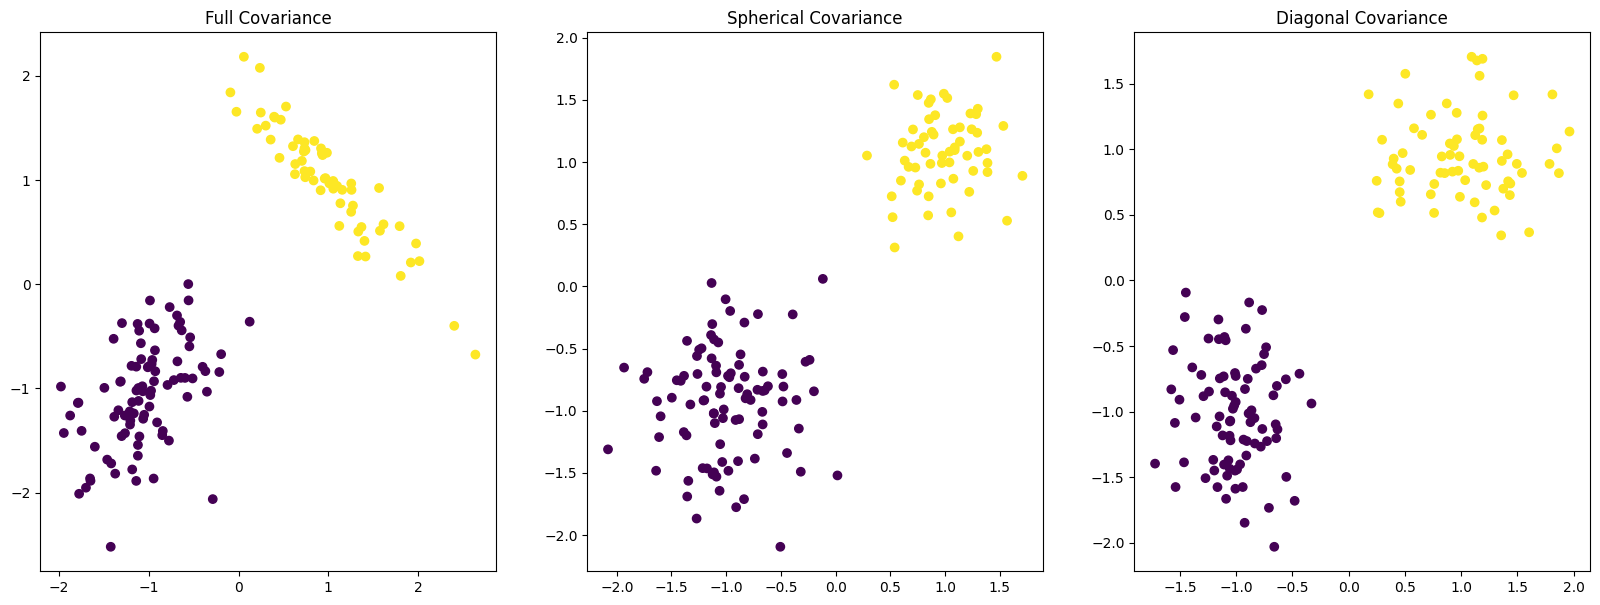

In [ ]:
# All imports
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats import norm, multivariate_normal
import sys
import math

##########################################
# Part-6)-a: Generating synthetic data
##########################################

def generateData(pi, mu, sigma, N):
    ############################################################################
    # pi = weights of Gaussians, mu = mean of Gaussians, sigma = covariance of Gaussians, N = number of data points
    # Steps
    # 1. Select the Gaussian following the probability distribution as pi
    # 2. Sample the data points from the selected Gaussian
    # 3. Repeat the process N times to get N data points
    # 4. Return the sampled data
    ############################################################################
    data = []
    labels = []
    for _ in range(N):
        # Selecting Gaussian based on pi probabilities
        k = np.random.choice(len(pi), p=pi)
        # Sampling from the selected Gaussian
        sample = np.random.multivariate_normal(mu[k], sigma[k])
        data.append(sample)
        labels.append(k)
    return np.asarray(data), np.asarray(labels)

############################################################################
# Choose the appropriate means ($\mu$), covariances ($\Sigma$), and weights
############################################################################
mu1 = np.array([-1.0, -1.0])  # Mean vector of component 1 in GMM
sig1 = np.array([[0.15, 0.1], [0.1, 0.25]])  # Full covariance matrix of component 1 in GMM
mu2 = np.array([1.0, 1.0])  # Mean vector of component 2 in GMM
sig2 = np.array([[0.3, -0.25], [-0.25, 0.25]])  # Full covariance matrix of component 2 in GMM
pi = np.array([0.6, 0.4])  # Prior probabilities

n_points = 150  # Number of points

# Spherical covariances
sig1_s = np.array([[0.2, 0.0], [0.0, 0.2]])
sig2_s = np.array([[0.1, 0.0], [0.0, 0.1]])
# Diagonal covariances
sig1_d = np.array([[0.1, 0.0], [0.0, 0.2]])
sig2_d = np.array([[0.2, 0.0], [0.0, 0.1]])

############################################################################
# Create the synthetic data set
############################################################################

data_full, labels_full = generateData(pi, [mu1, mu2], [sig1, sig2], n_points)
data_sp, labels_sp = generateData(pi, [mu1, mu2], [sig1_s, sig2_s], n_points)
data_dg, labels_dg = generateData(pi, [mu1, mu2], [sig1_d, sig2_d], n_points)

############################################################################
# Plot the synthetic data set
############################################################################

fig, ax = plt.subplots(1, 3, figsize=(20, 7))

# Visualize the data sampled from the GMM with full covariance matrix
ax[0].scatter(data_full[:, 0], data_full[:, 1], c=labels_full, cmap='viridis')
ax[0].set_title('Full Covariance')

# Visualize the data sampled from the GMM with spherical covariance matrix
ax[1].scatter(data_sp[:, 0], data_sp[:, 1], c=labels_sp, cmap='viridis')
ax[1].set_title('Spherical Covariance')

# Visualize the data sampled from the GMM with diagonal covariance matrix
ax[2].scatter(data_dg[:, 0], data_dg[:, 1], c=labels_dg, cmap='viridis')
ax[2].set_title('Diagonal Covariance')

plt.show()


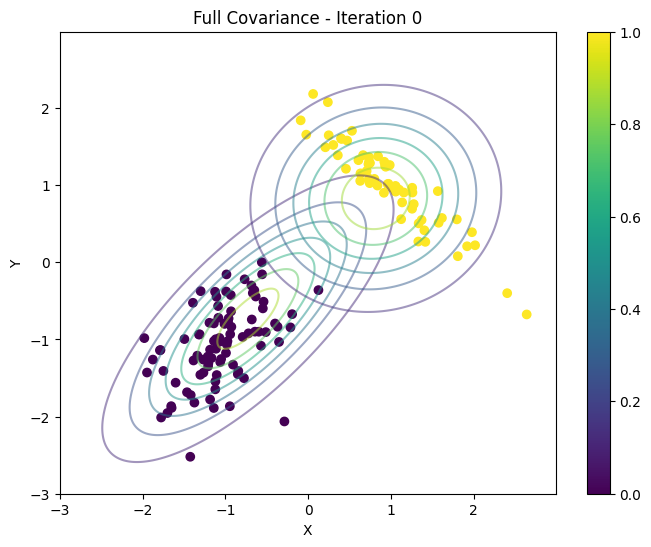

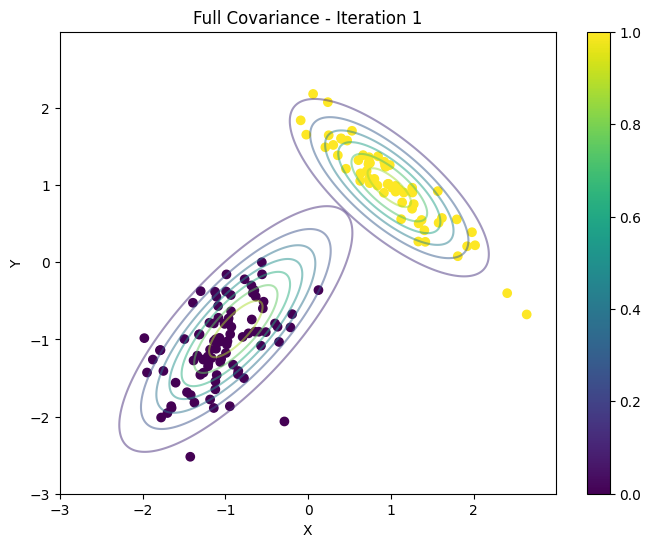

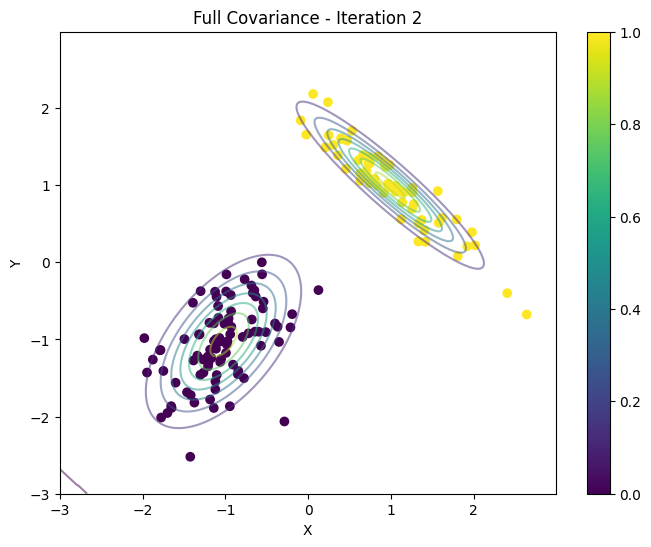

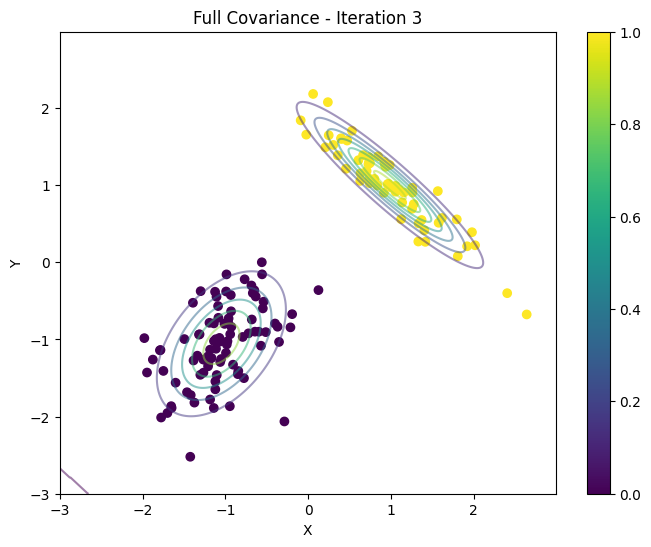

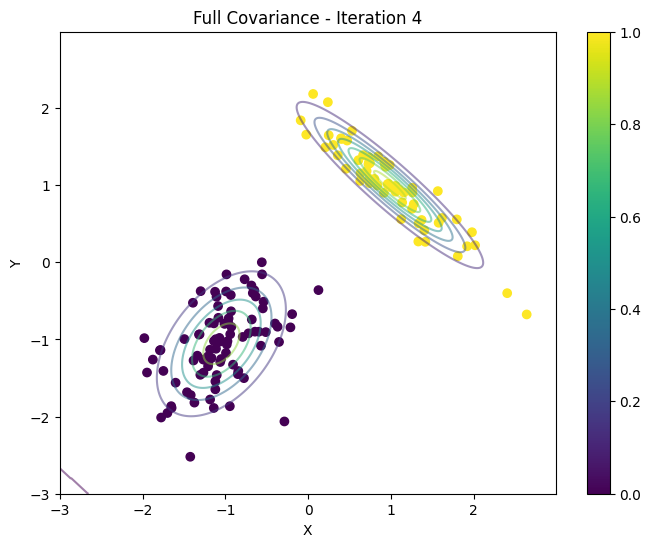

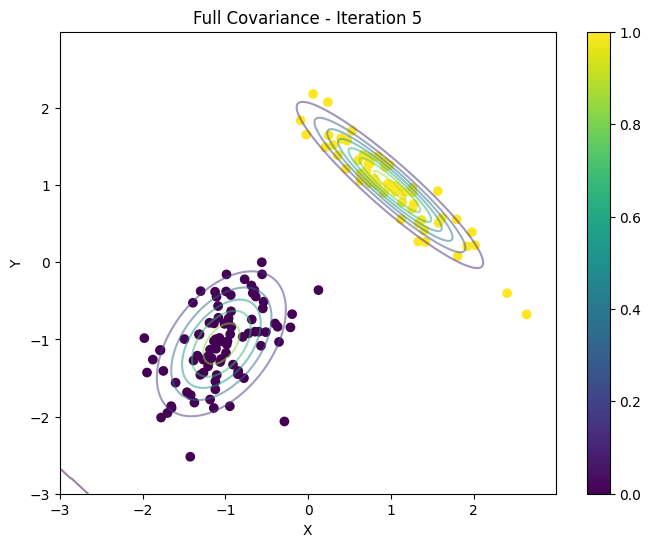

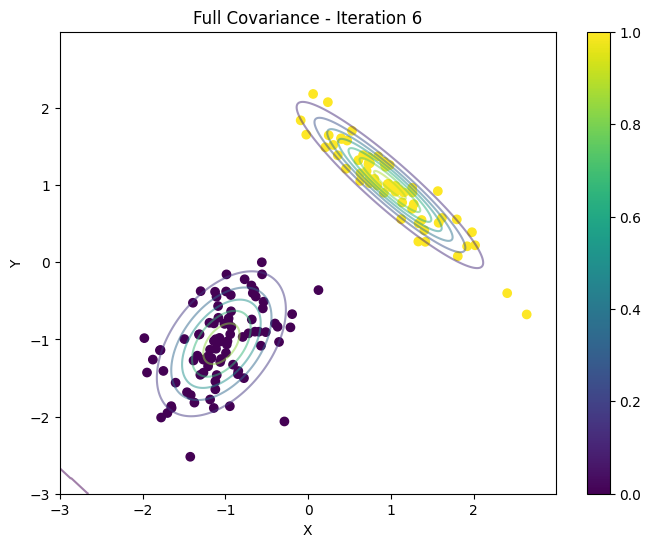

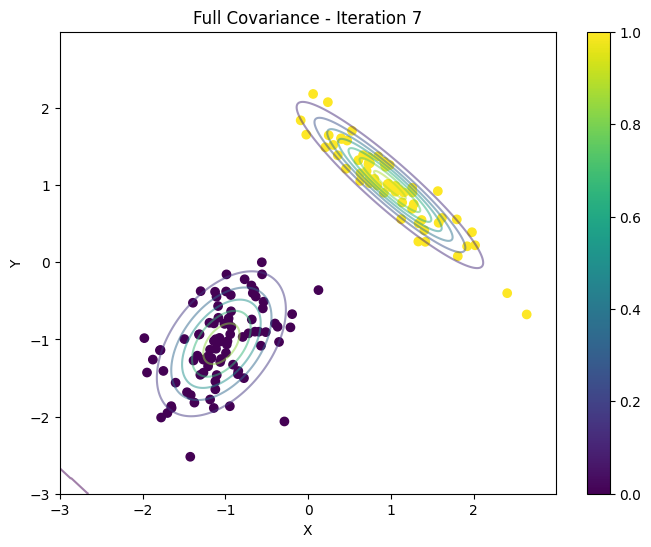

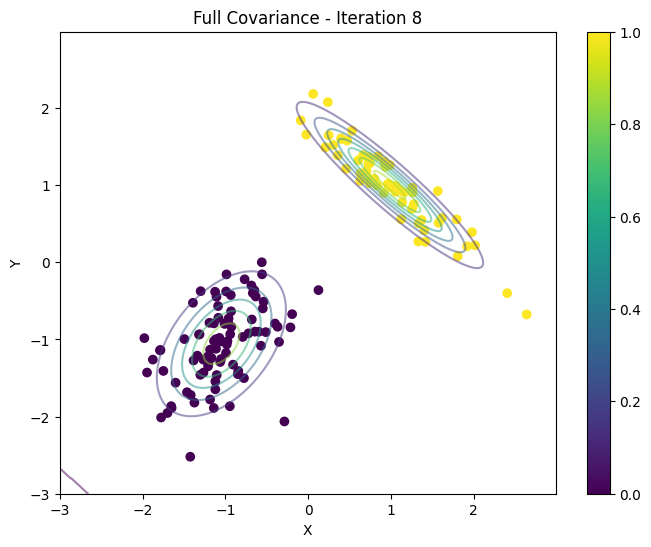

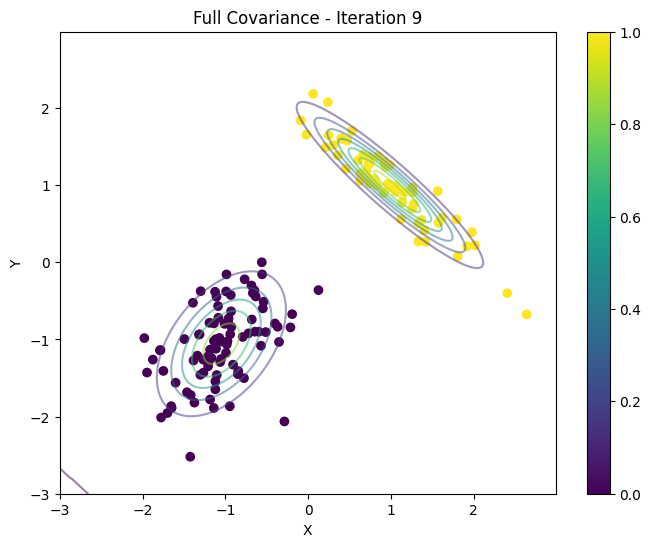

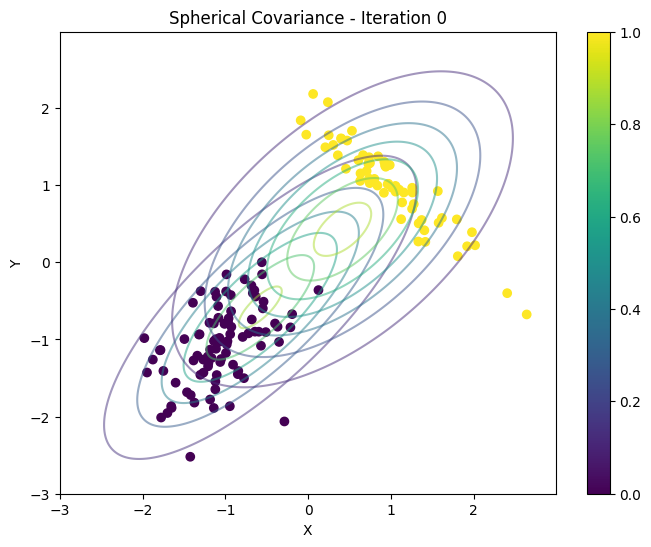

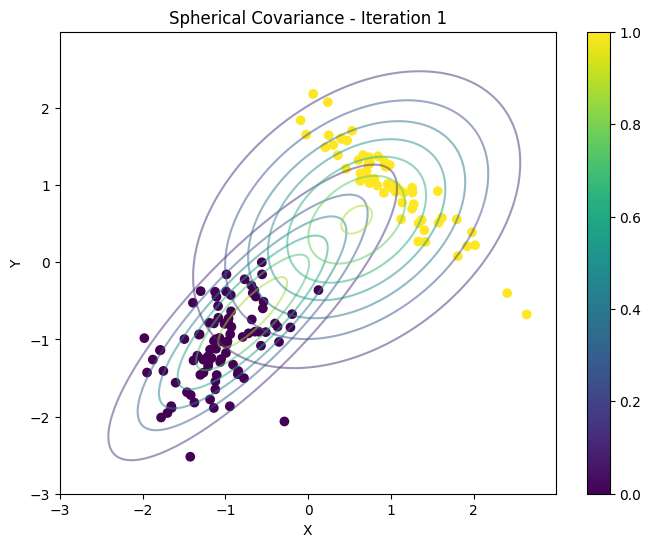

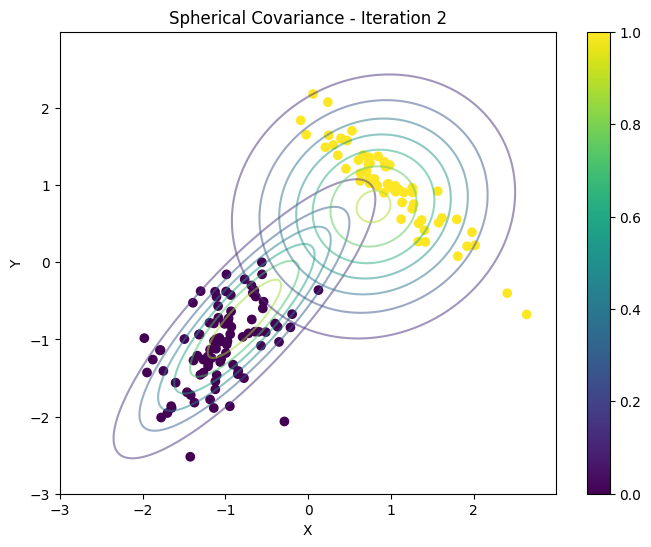

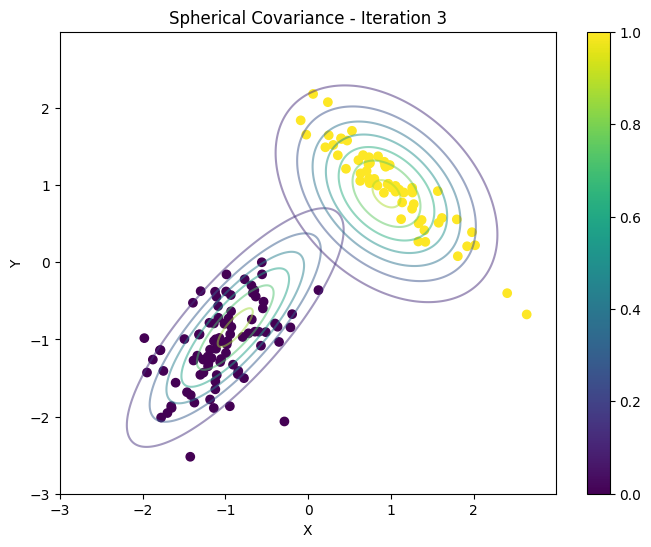

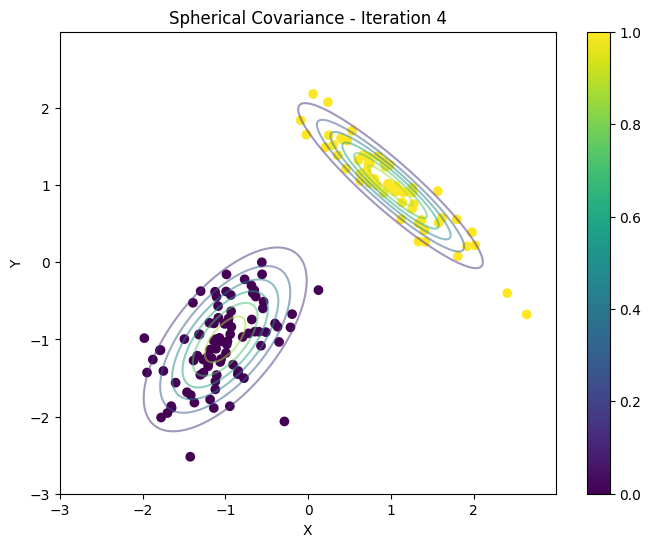

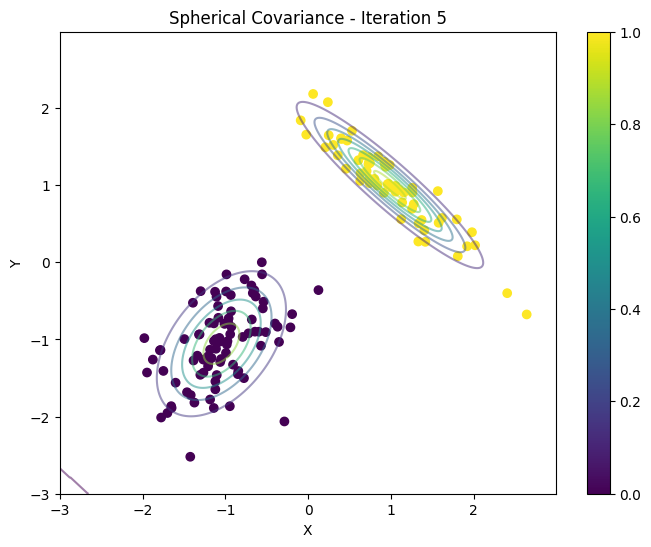

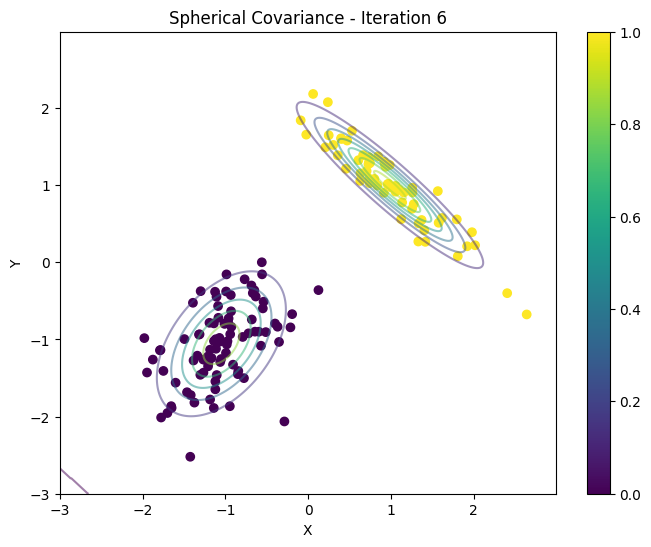

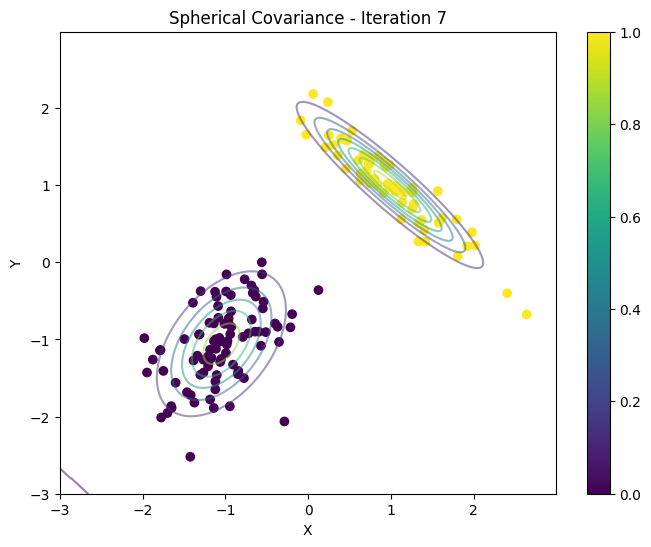

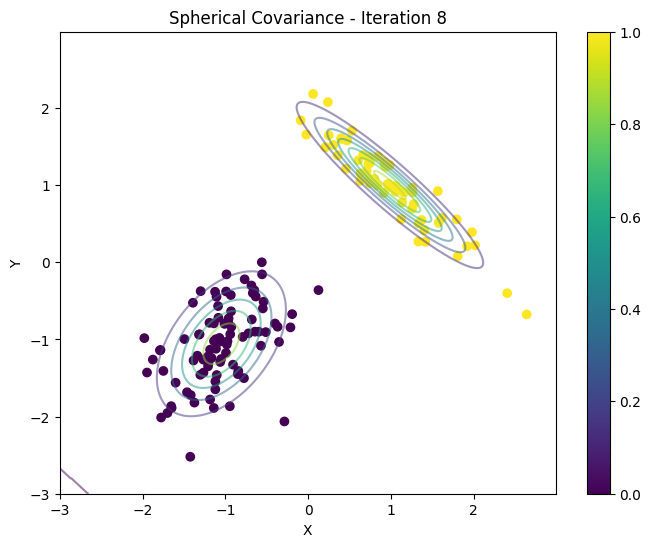

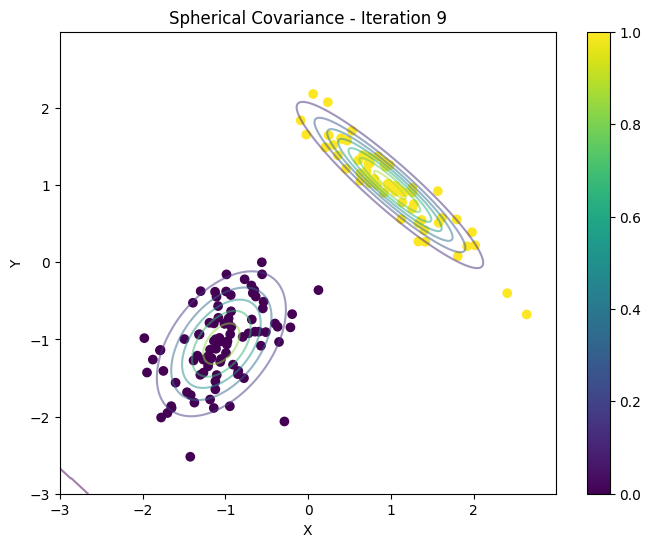

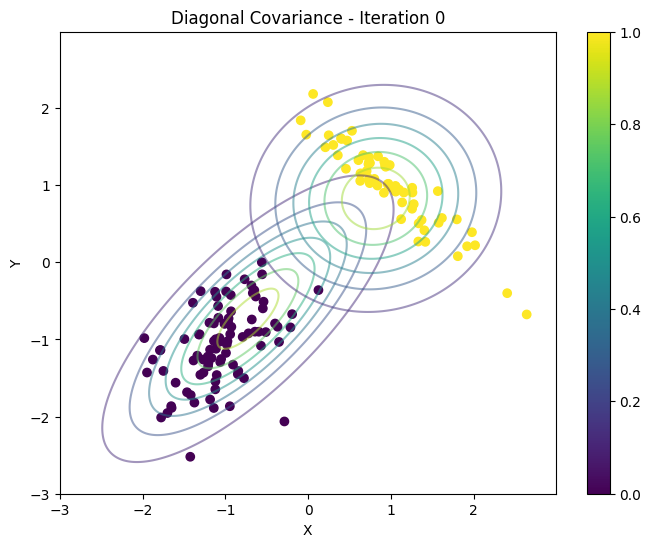

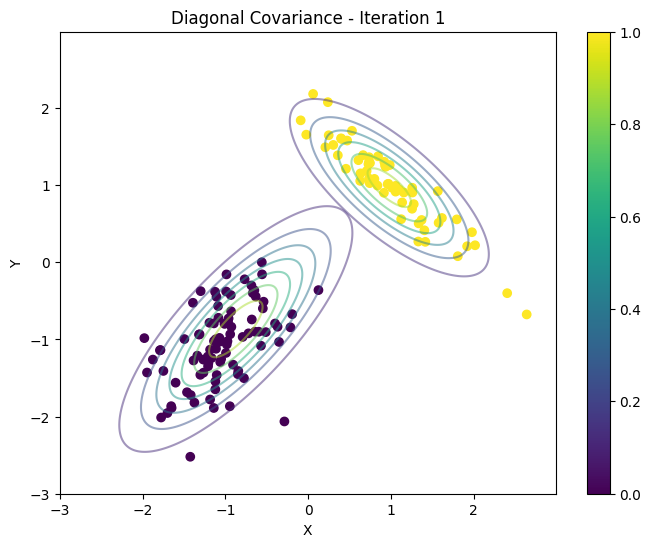

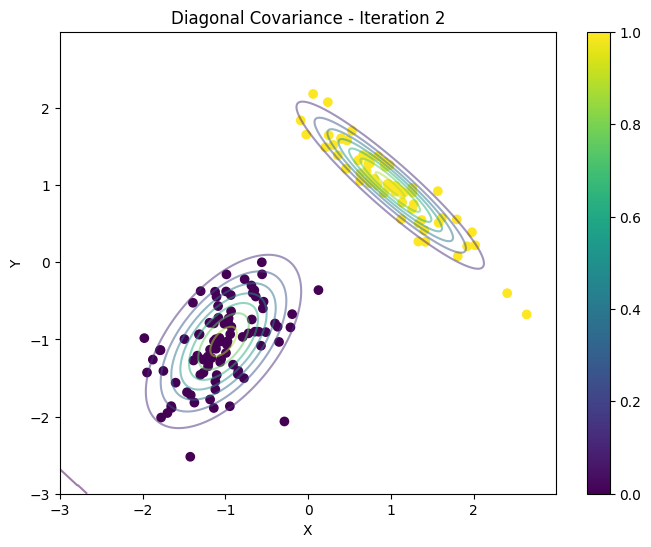

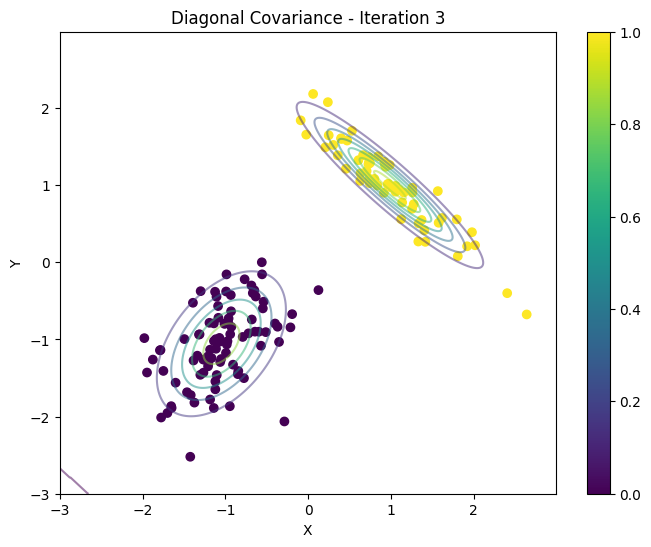

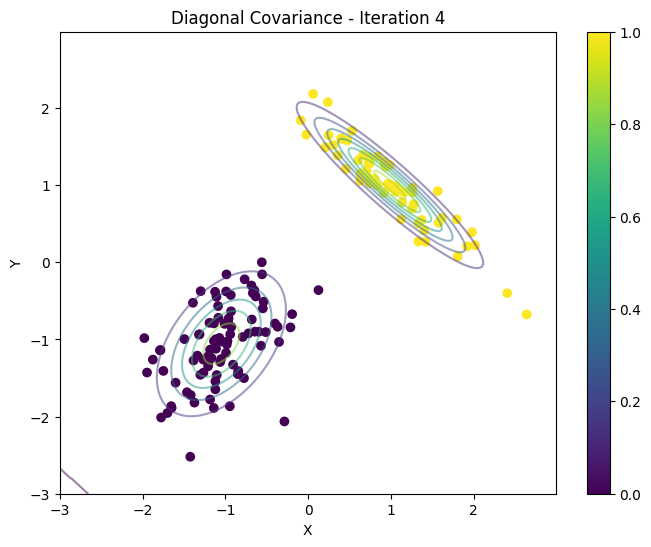

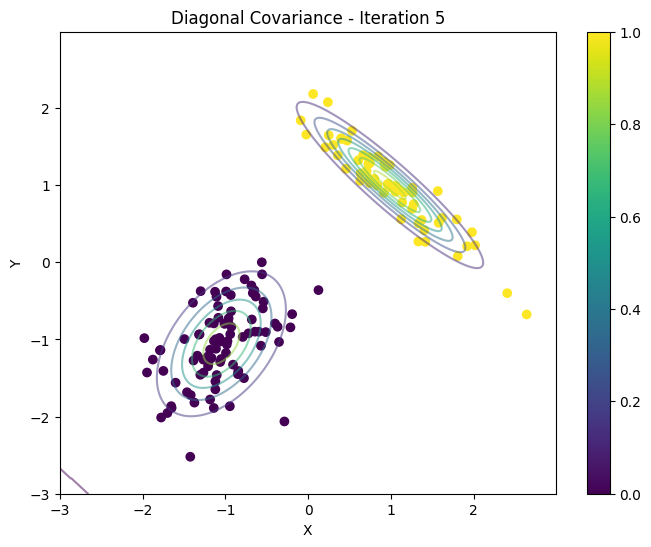

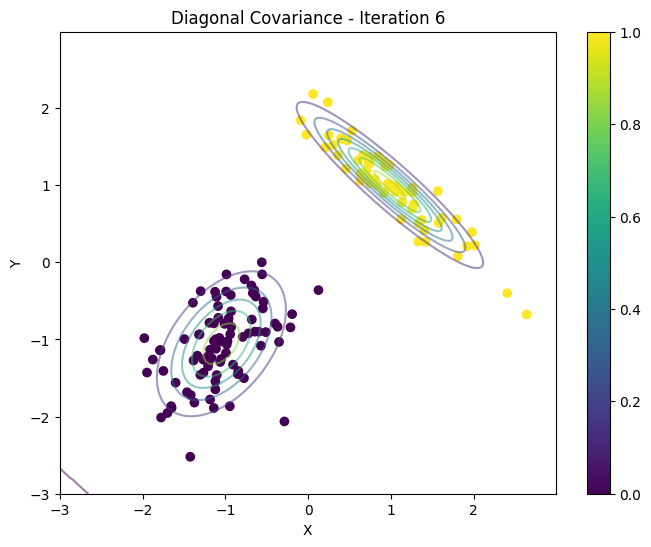

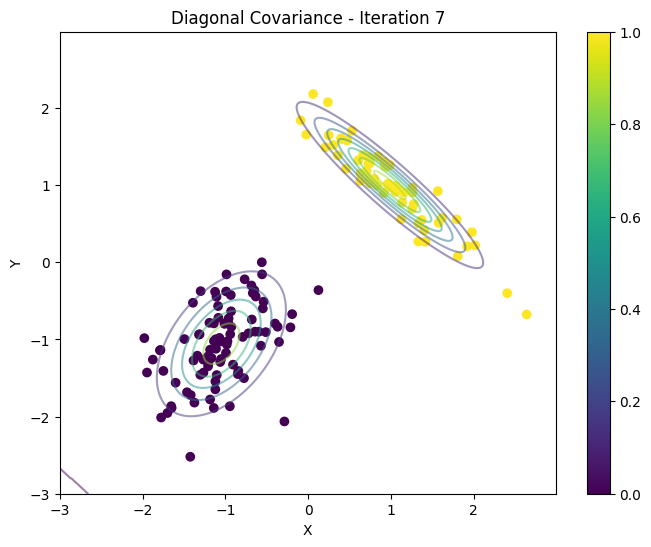

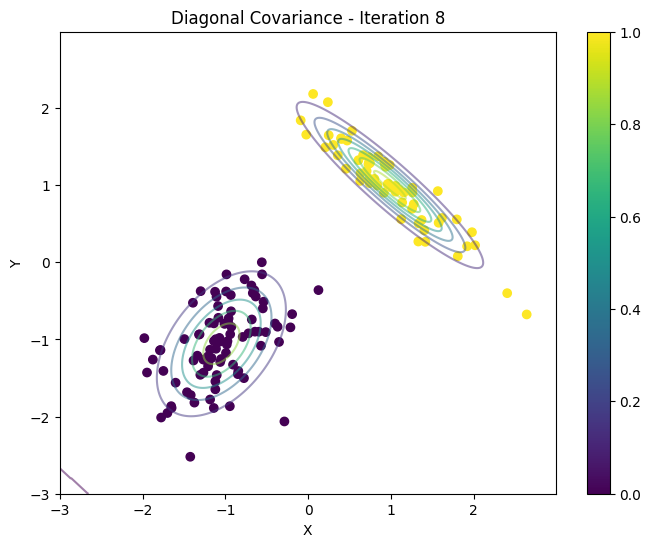

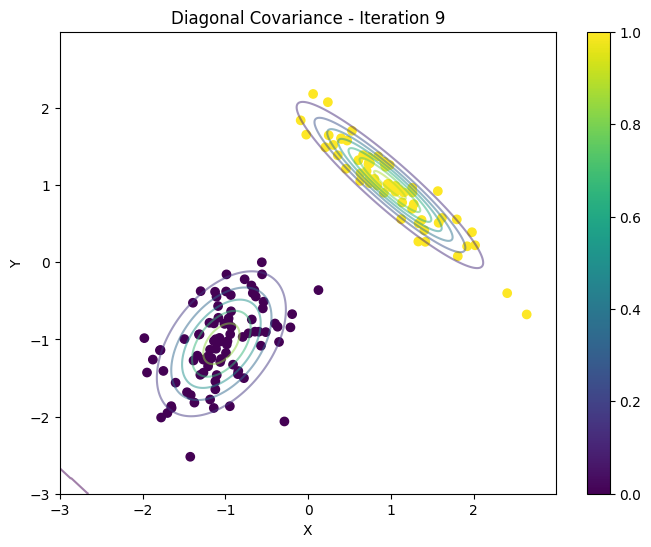

In [ ]:
# All imports
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal
import sys
import math

##########################################
# Part-6)-b: Implementation of Expectation-Maximization (EM) algorithm
##########################################

############################################################################
# Write a function to compute the log-likelihood of the data given the parameters
############################################################################
def likelihood(data, pi, mu, sigma, log_likelihood=False, likelihoods=False):
    # Inputs: data, parameters of GMM model
    # Outputs: likelihood
    likelihood_total = 0
    likelihoods = []
    for point in data:
        point_likelihood = 0
        for k in range(len(pi)):
            point_likelihood += pi[k] * multivariate_normal.pdf(point, mean=mu[k], cov=sigma[k])
        likelihoods.append(point_likelihood)
        likelihood_total += np.log(point_likelihood)
    if log_likelihood:
        return likelihood_total
    elif likelihoods:
        return likelihoods
    else:
        return np.exp(likelihood_total)

############################################################################
# Write a function for the expectation step
############################################################################
def expectation(data, pi, mu, sigma):
    # Inputs: data, parameters of GMM model
    # Outputs: gamma
    N = len(data)
    M = len(pi)
    gamma = np.zeros((N, M))
    for n in range(N):
        for k in range(M):
            numerator = pi[k] * multivariate_normal.pdf(data[n], mean=mu[k], cov=sigma[k])
            denominator = sum(pi[j] * multivariate_normal.pdf(data[n], mean=mu[j], cov=sigma[j]) for j in range(M))
            gamma[n, k] = numerator / denominator
    return gamma

############################################################################
# Write a function for the maximization step.
############################################################################
def maximization(data, gamma):
    # Inputs: data, gamma
    # Outputs: Updated parameters of GMM model
    Nk = np.sum(gamma, axis=0)
    pi_new = Nk / len(data)
    mu_new = np.dot(gamma.T, data) / Nk[:, np.newaxis]
    sigma_new = []
    for k in range(len(pi)):
        diff = data - mu_new[k]
        sigma_k = np.dot(gamma[:, k] * diff.T, diff) / Nk[k]
        sigma_new.append(sigma_k)
    return pi_new, mu_new, sigma_new

############################################################################
# Complete the below function. It plots the contours
############################################################################
def plot_contours(data, labels, pi, mu, sigma, title):
    plt.figure(figsize=(8, 6))
    x, y = np.mgrid[-3:3:.01, -3:3:.01]
    pos = np.dstack((x, y))
    for k in range(len(pi)):
        rv = multivariate_normal(mu[k], sigma[k])
        plt.contour(x, y, rv.pdf(pos), alpha=0.5)
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar()
    plt.show()

############################################################################
# Run the expectation and maximization algorithm to estimate the parameters
############################################################################
# Data to run EM-algorithm
data = data_full
labels = labels_full
N = len(data)
D = data.shape[1]
M = 2
pi = np.array([0.5, 0.5])
mu = np.array([[0.0, 0.0], [1.0, 1.0]])


sigma_full = [np.identity(D) for _ in range(M)]
sigma_spherical = [np.eye(D) * np.trace(sigma_full[0]), np.eye(D) * np.trace(sigma_full[1])]
sigma_diagonal = [np.diag(np.diag(sigma_full[0])), np.diag(np.diag(sigma_full[1]))]

# Number of steps to run EM algorithm
nsteps = 10
for index in range(0, nsteps, 1):

    # Compute the likelihood
    ll = likelihood(data, pi, mu, sigma_full, log_likelihood=True)

    # Expectation step
    gamma = expectation(data, pi, mu, sigma_full)

    # Maximization step
    pi, mu, sigma_full = maximization(data, gamma)

    # Plot the contours for full covariance
    plot_contours(data, labels, pi, mu, sigma_full, 'Full Covariance - Iteration {}'.format(index))

pi = np.array([0.5, 0.5])
mu = np.array([[0.0, 0.0], [1.0, 1.0]])
nsteps = 10
for index in range(0, nsteps, 1):

    ll = likelihood(data, pi, mu, sigma_spherical, log_likelihood=True)

    gamma = expectation(data, pi, mu, sigma_spherical)

    pi, mu, sigma_spherical = maximization(data, gamma)

    plot_contours(data, labels, pi, mu, sigma_spherical, 'Spherical Covariance - Iteration {}'.format(index))

# Re-initialize for diagonal covariance
pi = np.array([0.5, 0.5])
mu = np.array([[0.0, 0.0], [1.0, 1.0]])
nsteps = 10
for index in range(0, nsteps, 1):

    # Compute the likelihood
    ll = likelihood(data, pi, mu, sigma_diagonal, log_likelihood=True)

    # Expectation step
    gamma = expectation(data, pi, mu, sigma_diagonal)

    # Maximization step
    pi, mu, sigma_diagonal = maximization(data, gamma)

    # Plot the contours for diagonal covariance
    plot_contours(data, labels, pi, mu, sigma_diagonal, 'Diagonal Covariance - Iteration {}'.format(index))



--- Full Covariance ---

Iteration 1, Log Likelihood: -629.6099686212644
Iteration 2, Log Likelihood: -625.6284061011828
Iteration 3, Log Likelihood: -625.6282913142542
Iteration 4, Log Likelihood: -625.6282913140974
Iteration 5, Log Likelihood: -625.6282913140969
Iteration 6, Log Likelihood: -625.6282913140972
Iteration 7, Log Likelihood: -625.6282913140973
Iteration 8, Log Likelihood: -625.6282913140973
Iteration 9, Log Likelihood: -625.6282913140973
Iteration 10, Log Likelihood: -625.6282913140973


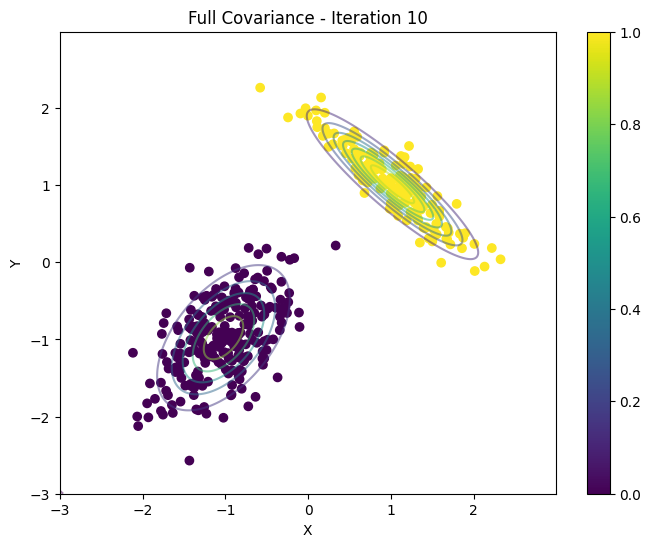


--- Spherical Covariance ---

Iteration 1, Log Likelihood: -659.9710671984694
Iteration 2, Log Likelihood: -645.4025251789926
Iteration 3, Log Likelihood: -645.0260217301011
Iteration 4, Log Likelihood: -645.0207454206628
Iteration 5, Log Likelihood: -645.0207091712589
Iteration 6, Log Likelihood: -645.0207089430183
Iteration 7, Log Likelihood: -645.0207089415919
Iteration 8, Log Likelihood: -645.0207089415834
Iteration 9, Log Likelihood: -645.0207089415829
Iteration 10, Log Likelihood: -645.0207089415834


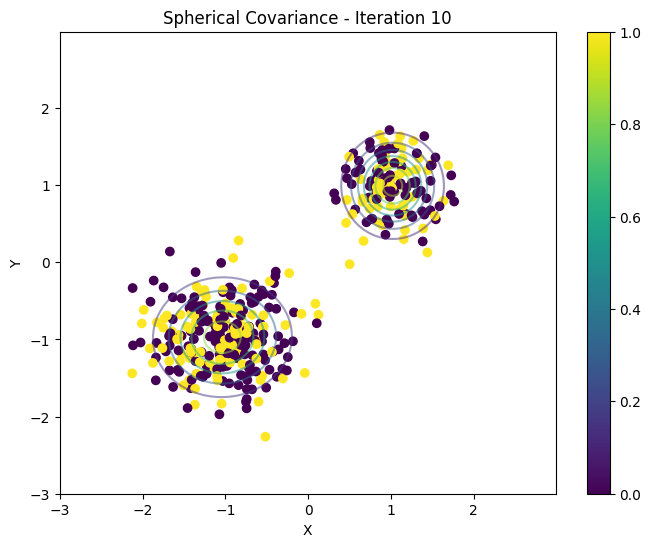


--- Diagonal Covariance ---

Iteration 1, Log Likelihood: -661.9430318987846
Iteration 2, Log Likelihood: -631.156550362055
Iteration 3, Log Likelihood: -630.3973743628783
Iteration 4, Log Likelihood: -630.3973159701388
Iteration 5, Log Likelihood: -630.3973159605712
Iteration 6, Log Likelihood: -630.3973159605682
Iteration 7, Log Likelihood: -630.3973159605686
Iteration 8, Log Likelihood: -630.3973159605694
Iteration 9, Log Likelihood: -630.3973159605688
Iteration 10, Log Likelihood: -630.3973159605689


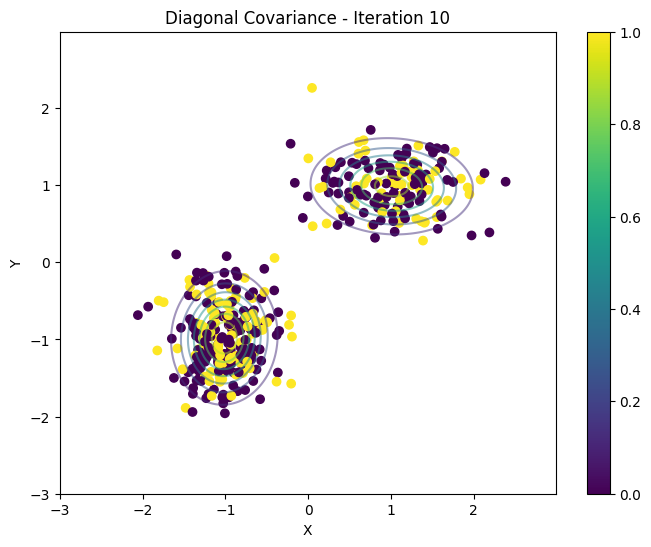

In [ ]:
# Part-6)-c & d: Solving with EM Algorithm & Visualization

# Synthetic Data Generation
def generate_synthetic_data(pi, mu, sigma, N=400):
    """Generates synthetic data based on specified GMM parameters."""
    categories = np.random.choice(len(pi), size=N, p=pi)
    data = np.array([np.random.multivariate_normal(mu[cat], sigma[cat]) for cat in categories])
    return data, categories


pi = [0.6, 0.4]
mu = [np.array([-1.0, -1.0]), np.array([1.0, 1.0])]
sigma_full = [np.array([[0.15, 0.1], [0.1, 0.25]]), np.array([[0.3, -0.25], [-0.25, 0.25]])]
sigma_spherical = [np.eye(2) * 0.2, np.eye(2) * 0.1]
sigma_diagonal = [np.diag([0.1, 0.2]), np.diag([0.2, 0.1])]

data_full, labels_full = generate_synthetic_data(pi, mu, sigma_full)
data_spherical, _ = generate_synthetic_data(pi, mu, sigma_spherical)
data_diagonal, _ = generate_synthetic_data(pi, mu, sigma_diagonal)

covariance_types = {
    'Full': sigma_full,
    'Spherical': sigma_spherical,
    'Diagonal': sigma_diagonal
}

for cov_type, sigma in covariance_types.items():
    print(f"\n--- {cov_type} Covariance ---\n")
    pi_init = np.array([0.5, 0.5])
    mu_init = np.array([[0.0, 0.0], [1.0, 1.0]])
    data = data_full if cov_type == 'Full' else data_spherical if cov_type == 'Spherical' else data_diagonal

    for index in range(10):  # Running 10 iterations for simplicity
        gamma = expectation(data, pi_init, mu_init, sigma)
        pi_new, mu_new, sigma_new = maximization(data, gamma)
        ll = likelihood(data, pi_new, mu_new, sigma_new, log_likelihood=True)
        print(f"Iteration {index + 1}, Log Likelihood: {ll}")

        # Update for the next iteration
        pi_init, mu_init, sigma = pi_new, mu_new, sigma_new

        if index == 9:  # Last iteration, plot the contours
            plot_contours(data, labels_full, pi_new, mu_new, sigma, f'{cov_type} Covariance - Iteration {index + 1}')

<b> Report your observations </b>
### Convergence and Log Likelihood
- **Convergence**: The EM algorithm iteratively improves the estimates of the GMM parameters, converging towards a local maximum of the log-likelihood function. This behavior is evident in the increasing log-likelihood values over iterations, indicating that the model is better fitting the data with each step.
- **Log Likelihood**: The log-likelihood metric provides a quantitative measure of how well the model fits the data. A higher log-likelihood value suggests a better fit. However, it's important to monitor for overfitting, especially with complex models having many parameters.

### Impact of Covariance Matrix Types
- **Full Covariance**: Allows the most flexibility, enabling each component of the GMM to have its unique shape, orientation, and volume. This flexibility often leads to a better fit to the data, as observed in the detailed contours that closely follow the data distribution. However, it also requires estimating more parameters, which can increase the risk of overfitting, especially with limited data.
- **Spherical Covariance**: Assumes all directions have the same variance, restricting the components to adopt spherical shapes. While this simplification reduces the number of parameters and computational complexity, it might not capture the data's structure well if the true distribution is elongated or oriented in a specific direction.
- **Diagonal Covariance**: Sits between full and spherical covariance, allowing different variances along each dimension but no covariance between dimensions. This assumption permits ellipsoidal shapes but aligned with the axis, offering a balance between flexibility and parameter count. It can better model the data than spherical covariance if the true distributions are elongated but may still underperform compared to full covariance if the distributions are also rotated.

### Visualization and Model Selection
- **Contour Plots**: Visualization of the fitted GMM components through contour plots is invaluable for understanding the model's behavior. These plots can reveal how well each component captures the data clusters and the overall data structure.
- **Model Selection**: Choosing the right covariance structure is crucial. While full covariance models offer the most flexibility, they may not always be the best choice due to the risk of overfitting and higher computational costs. The choice should be guided by the data structure, the task at hand, and model complexity considerations. Techniques such as cross-validation and information criteria (e.g., AIC, BIC) can aid in selecting an appropriate model.

### Final Thoughts
The EM algorithm's effectiveness in parameter estimation for GMMs is evident, but its performance heavily depends on the initial parameter guesses and the covariance matrix structure. Understanding the trade-offs between model complexity and flexibility is crucial for making informed decisions in GMM applications. This exercise underscores the importance of exploratory data analysis and model validation in building robust machine learning models.

